In [4]:
import pandas as pd

In [3]:
pip install pandas

In [1]:
file_path = 'PetDat55.csv'

In [89]:
df = pd.read_csv('PetDat55.csv')

In [74]:
df_copy = df.copy()

In [90]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])


In [91]:
df.head()

,overall,reviewTime,asin,pet_type,sentiment,clean_review,score2
0,5.0,2014-04-16,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,2014-04-16,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2,5.0,2013-03-18,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,2014-04-16,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
4,5.0,2014-03-08,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [82]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%Y_%m_%d_%H:%M:%S')
df.set_index('reviewTime', inplace=True)

print(df)


            overall        asin pet_type sentiment  \
reviewTime                                           
2014-04-16      5.0  1300450991      dog  positive   
2014-04-16      5.0  1300450991      dog  positive   
2013-03-18      5.0  1300450991      dog  positive   
2014-04-16      5.0  130045136X      cat  positive   
2014-03-08      5.0  130045136X      cat  positive   
...             ...         ...      ...       ...   
2017-05-29      5.0  B01HIPJRBM      cat  positive   
2017-04-30      4.0  B01HIPJRBM      cat  positive   
2018-09-29      5.0  B01HIQ9NGU      dog  positive   
2018-08-17      5.0  B01HIQ9NGU      dog  positive   
2018-06-01      4.0  B01HIQ9NGU      dog   neutral   

                                                 clean_review  score2  
reviewTime                                                             
2014-04-16  Puppy Booster Herbal Supplement for Dogs Puppy...  0.8834  
2014-04-16  good for puppies who not have problems to keep...  0.9435  
2013-03-1

In [88]:
df.head()

,overall,asin,pet_type,sentiment,clean_review,score2
reviewTime,,,,,,
2014-04-16,5.0,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
2014-04-16,5.0,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2013-03-18,5.0,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
2014-04-16,5.0,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
2014-03-08,5.0,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [87]:
df.set_index('reviewTime', inplace=True)

In [287]:
df.shape

(1675444, 7)

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [55]:
df.head()

,overall,asin,pet_type,sentiment,clean_review,score2
reviewTime,,,,,,
2014-04-16,5.0,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
2014-04-16,5.0,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2013-03-18,5.0,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
2014-04-16,5.0,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
2014-03-08,5.0,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [ ]:
#4thMay update to df due to error in df2
#again 5thMay #sideeye
#sia sentiment score

# did new clean review and polarity column_score2
# Make sure the column 'reviewText' is of string type
df['summary1'] = df['summary1'].apply(str)
# Remove special characters
df['clean_review'] = df['summary1'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
df['clean_review'] = df['clean_review'].str.strip()

# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

# Generate a new column to store the compound scores

df['score2'] = df.apply(lambda x: getSentScore(x['clean_review']), axis=1)

# Take a look 

df.head(5)

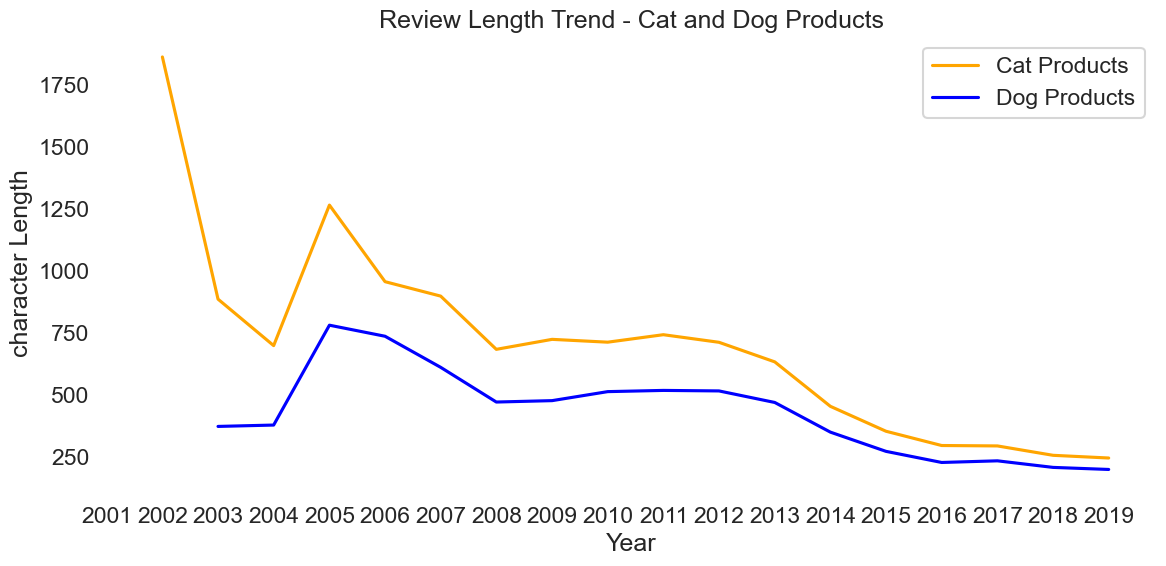

In [32]:
# Drop rows with missing values in 'clean_review'
df = df.dropna(subset=['clean_review'])

# Calculate review length
df['review_length'] = df['clean_review'].apply(len)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create separate dataframes for cat and dog reviews
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Resample by year
cat_yearly_length = cat_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()
dog_yearly_length = dog_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()

# Create the plots
fig, ax = plt.subplots(figsize=(12, 6))

# Cat review length trend
sns.lineplot(data=cat_yearly_length, x='reviewTime', y='review_length', ax=ax, label='Cat Products', color='orange')

# Dog review length trend
sns.lineplot(data=dog_yearly_length, x='reviewTime', y='review_length', ax=ax, label='Dog Products', color='blue')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax)
ax.grid(False)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel("Year")
ax.set_ylabel("character Length")
ax.set_title("Review Length Trend - Cat and Dog Products")
ax.legend()

plt.tight_layout()
plt.show()


In [7]:
df.head()

,overall,reviewTime,asin,pet_type,sentiment,clean_review,score2
0,5.0,"04 16, 2014",1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


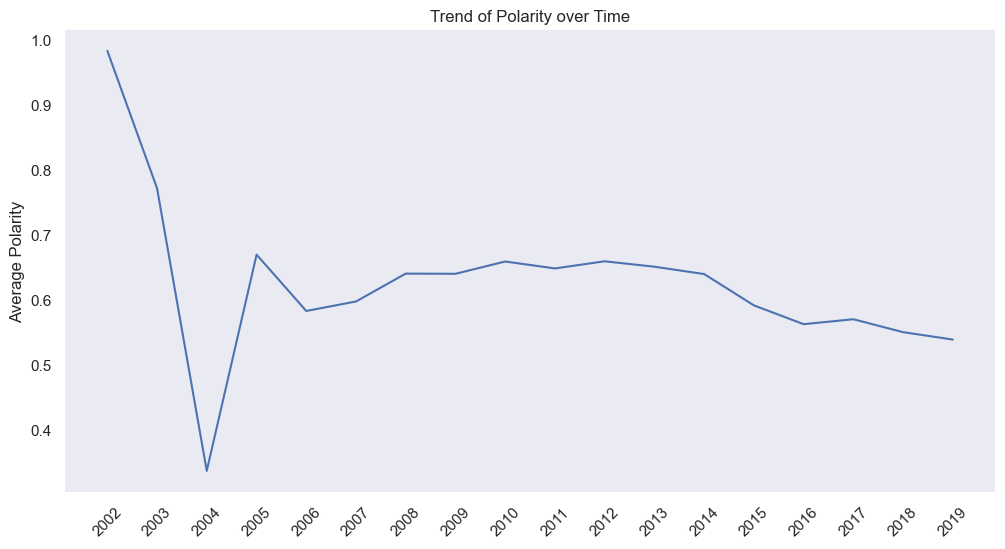

In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Resample by year
df_yearly_polarity = df.resample('Y', on='reviewTime')['score2'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly_polarity, x='reviewTime', y='score2')

# Set the x-axis ticks to display years in YYYY format
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())

# Customize the plot appearance
sns.despine(left=True, bottom=True)
plt.grid(False)
plt.xticks(rotation=45)
plt.xlabel("")  # No x-axis label
plt.ylabel("Average Polarity")
plt.title("Trend of Polarity over Time")
plt.show()


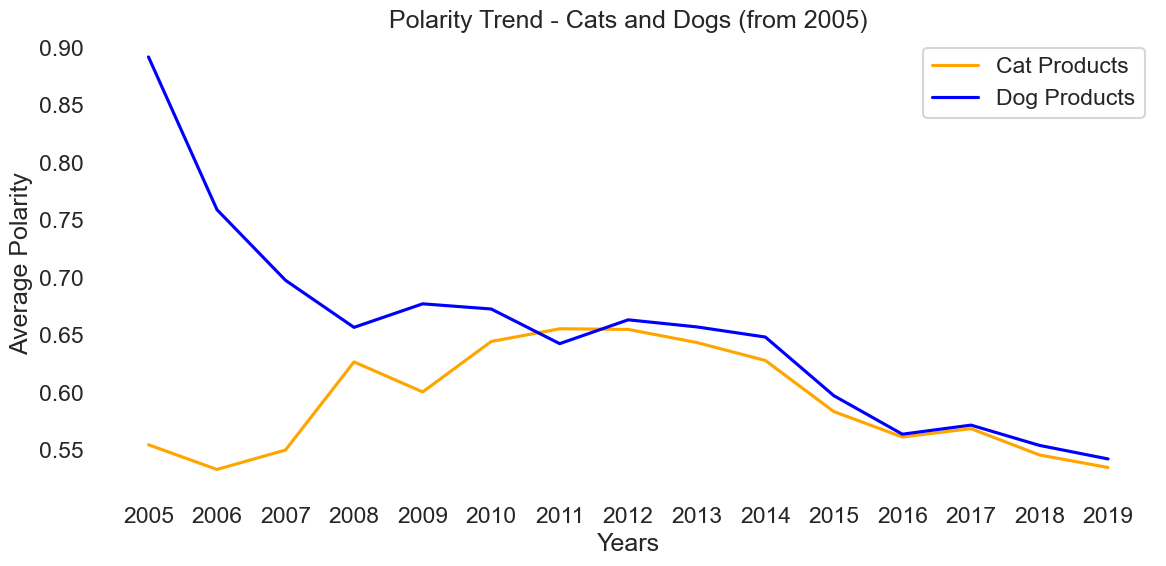

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Filter data to keep only entries from 2005 onwards
cat_df_filtered = cat_df[cat_df['reviewTime'].dt.year >= 2004]
dog_df_filtered = dog_df[dog_df['reviewTime'].dt.year >= 2004]

# Resample by year
cat_yearly_polarity = cat_df_filtered.resample('Y', on='reviewTime')['score2'].mean().reset_index()
dog_yearly_polarity = dog_df_filtered.resample('Y', on='reviewTime')['score2'].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Cat polarity trend
sns.lineplot(data=cat_yearly_polarity, x='reviewTime', y='score2', ax=ax, label='Cat Products', color='orange')

# Dog polarity trend
sns.lineplot(data=dog_yearly_polarity, x='reviewTime', y='score2', ax=ax, label='Dog Products', color='blue')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax)
ax.grid(False)
ax.set_xlabel("Years")
ax.set_ylabel("Average Polarity")
ax.set_title("Polarity Trend - Cats and Dogs (from 2005)")
ax.legend()

plt.tight_layout()
plt.show()


In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression

def calculate_slope(df, x_col, y_col):
    x = np.array(df[x_col]).reshape(-1, 1)
    y = np.array(df[y_col]).reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    
    return model.coef_[0][0]

# Calculate the slope for cat products
cat_slope = calculate_slope(cat_yearly_polarity, 'reviewTime', 'score2')
print("Slope for cat products:", cat_slope)

# Calculate the slope for dog products
dog_slope = calculate_slope(dog_yearly_polarity, 'reviewTime', 'score2')
print("Slope for dog products:", dog_slope)


Slope for cat products: -3.704610169880197e-20
Slope for dog products: -5.603504021693889e-19


In [47]:
#calculating slope of the polarity trend curve

import numpy as np
from sklearn.linear_model import LinearRegression

def calculate_slope(df, x_col, y_col):
    x = np.array(df[x_col]).reshape(-1, 1)
    y = np.array(df[y_col]).reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    
    return model.coef_[0][0]

# Calculate the slope for cat products
overall_slope = calculate_slope(overall_yearly_polarity, 'reviewTime', 'score2')
print("Slope for overall products:", overall_slope)


Slope for overall products: -1.9674473047495421e-19


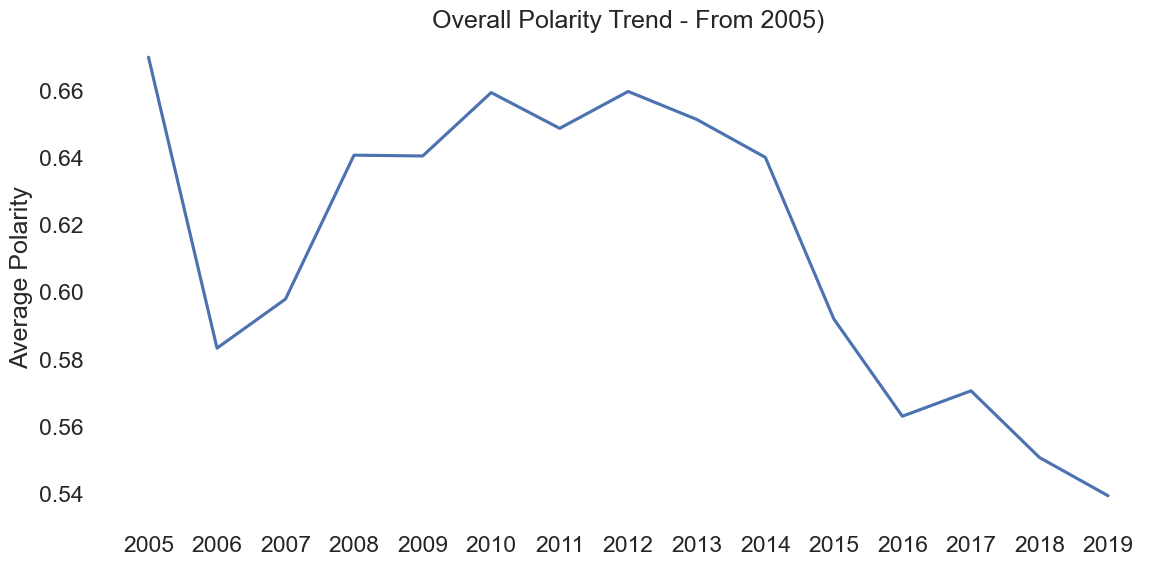

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data to keep only entries from 2005 onwards
df_filtered = df[df['reviewTime'].dt.year >= 2004]

# Resample by year
overall_yearly_polarity = df_filtered.resample('Y', on='reviewTime')['score2'].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Overall polarity trend
sns.lineplot(data=overall_yearly_polarity, x='reviewTime', y='score2')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax)
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("Average Polarity")
ax.set_title("Overall Polarity Trend - From 2005)")

plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-30.609, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-27.777, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-29.976, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.114, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-29.043, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-31.336, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-29.348, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.954 seconds


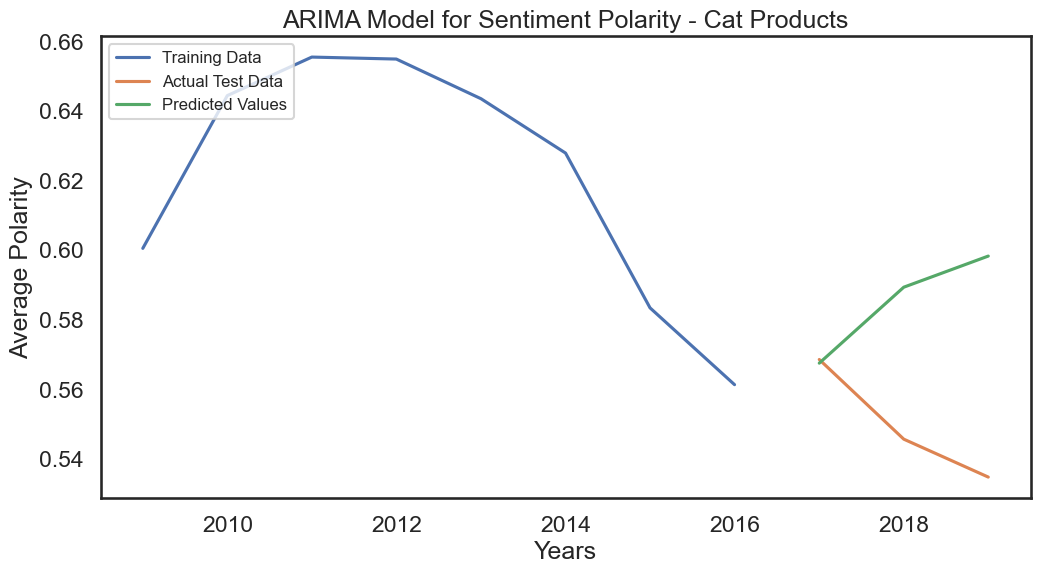

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

# Filter the DataFrame to keep only data from 2004 and onwards
cat_df = cat_df[cat_df.index.year >= 2005]

# Resample by year and calculate average polarity
cat_yearly_polarity = cat_df['score2'].resample('Y').mean()

# Split the data into a training and testing set (80%/20%)
train = cat_yearly_polarity[:int(0.8*len(cat_yearly_polarity))]
test = cat_yearly_polarity[int(0.8*len(cat_yearly_polarity)):]

# Fit the ARIMA model using the auto_arima function
model = auto_arima(train, seasonal=True, m=1, trace=True, suppress_warnings=True)
model.fit(train)

# Make predictions on the test set
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Predicted Values')
plt.legend(loc='upper left', fontsize=12)
plt.title('ARIMA Model for Sentiment Polarity - Cat Products')
plt.xlabel('Years')
plt.ylabel('Average Polarity')
plt.show()




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-41.297, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-37.494, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-43.064, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-40.752, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.975, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-41.449, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-41.263, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-39.140, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.558 seconds


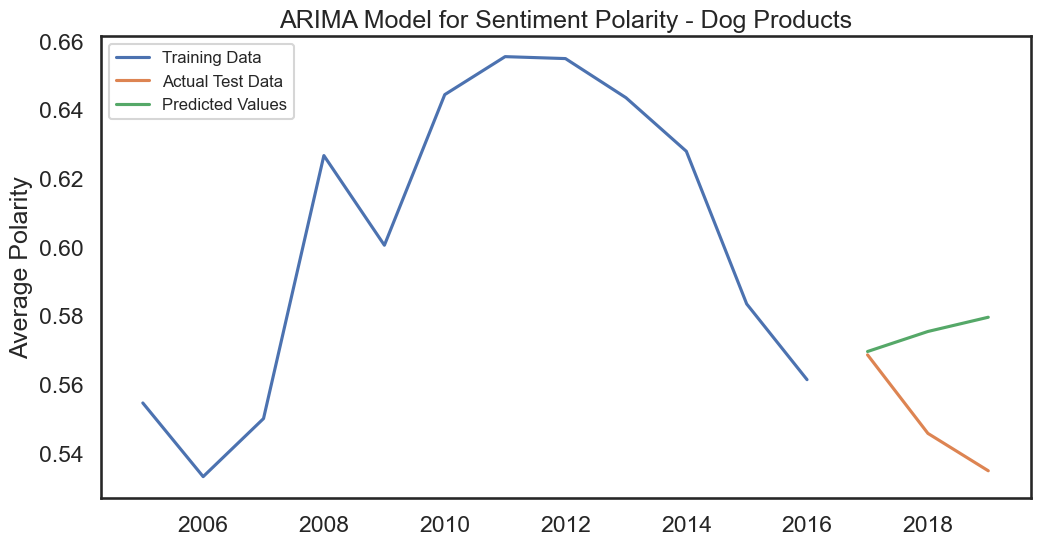

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

# Make sure the DataFrame has a datetime index
dog_df = dog_df[dog_df.index.year >= 2004]

# Resample by year and calculate average polarity
dog_yearly_polarity = cat_df['score2'].resample('Y').mean()

# Split the data into a training and testing set (80%/20%)
train = dog_yearly_polarity[:int(0.8*len(dog_yearly_polarity))]
test = dog_yearly_polarity[int(0.8*len(dog_yearly_polarity)):]

# Fit the ARIMA model using the auto_arima function
model = auto_arima(train, seasonal=True, m=1, trace=True, suppress_warnings=True)
model.fit(train)

# Make predictions on the test set
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Predicted Values')
plt.legend(loc='upper left', fontsize=12)
plt.title('ARIMA Model for Sentiment Polarity - Dog Products')
plt.xlabel('')
plt.ylabel('Average Polarity')
plt.show()


In [103]:
from scipy.stats import linregress

# Filter the DataFrames to keep only data from 2004 and onwards
cat_df_filtered = cat_df[cat_df.index.year >= 2004]
dog_df_filtered = dog_df[dog_df.index.year >= 2004]

# Resample by year and calculate average polarity
cat_yearly_polarity = cat_df_filtered['score2'].resample('Y').mean().reset_index()
dog_yearly_polarity = dog_df_filtered['score2'].resample('Y').mean().reset_index()

# Calculate the slope for cat and dog products
cat_slope = linregress(cat_yearly_polarity.index, cat_yearly_polarity['score2']).slope
dog_slope = linregress(dog_yearly_polarity.index, dog_yearly_polarity['score2']).slope

print("Slope for cat products:", cat_slope)
print("Slope for dog products:", dog_slope)


Slope for cat products: -0.011189504668800258
Slope for dog products: -0.01768376839810425


In [61]:
df.head()

,overall,reviewTime,asin,pet_type,sentiment,clean_review,score2
0,5.0,2014-04-16,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,2014-04-16,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2,5.0,2013-03-18,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,2014-04-16,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
4,5.0,2014-03-08,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [49]:
pip install pmdarima

     ------------------------------------ 572.7/572.7 kB 766.3 kB/s eta 0:00:00
     ---------------------------------------- 9.4/9.4 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 988.1/988.1 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install scikit-learn



     ---------------------------------------- 8.4/8.4 MB 1.1 MB/s eta 0:00:00


In [43]:
import pandas as pd
from pyspark.sql.functions import col
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


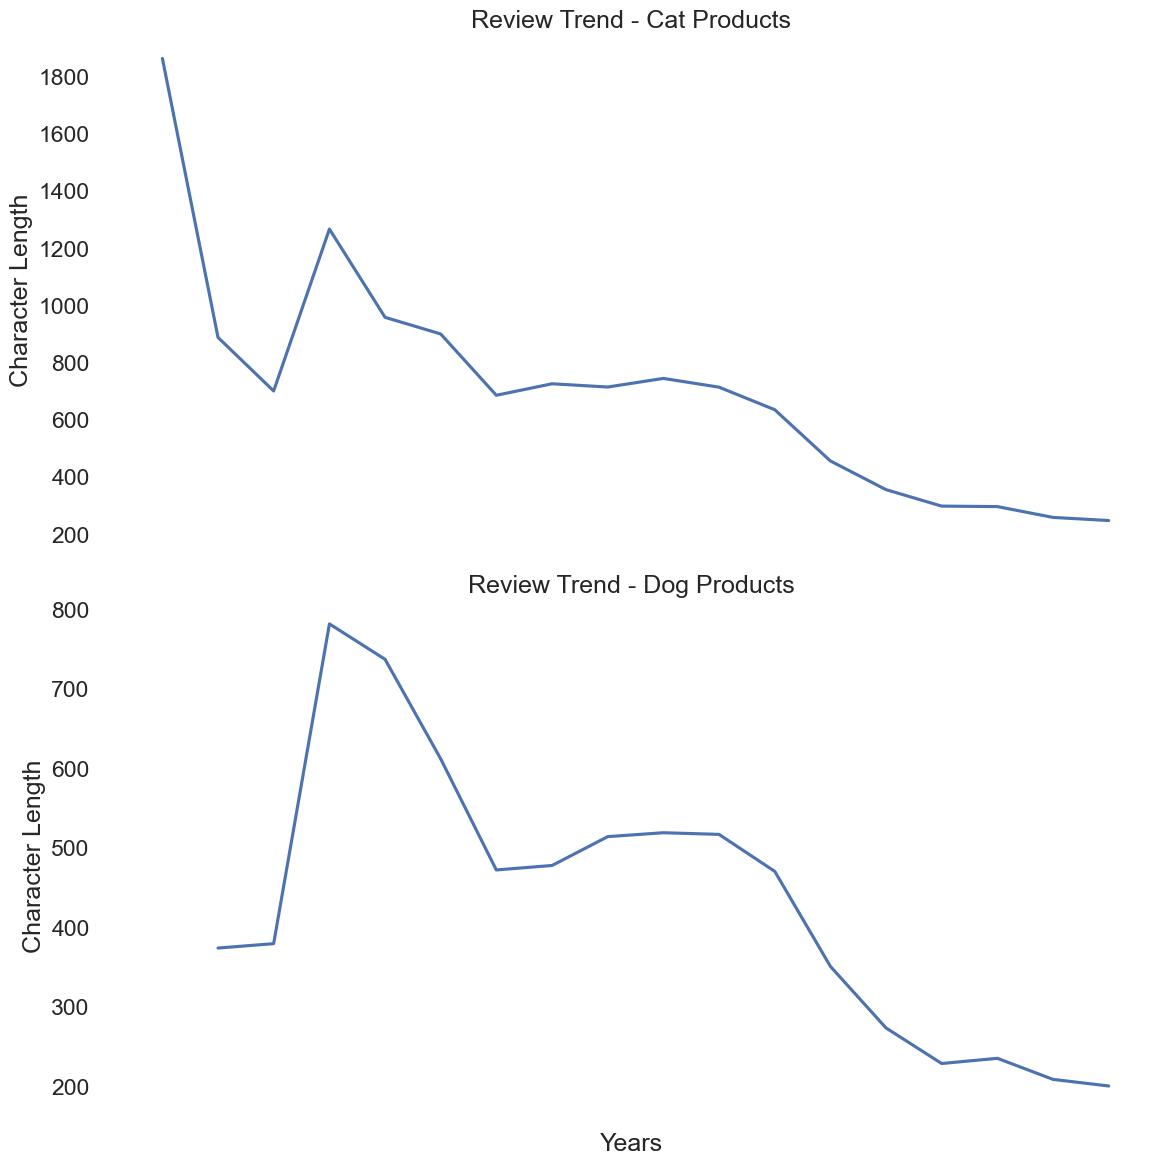

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate review length
df['review_length'] = df['clean_review'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create separate dataframes for cat and dog reviews
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Resample by year
cat_yearly_length = cat_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()
dog_yearly_length = dog_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()

# Create the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Cat review length trend
sns.lineplot(data=cat_yearly_length, x='reviewTime', y='review_length', ax=ax1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax1)
ax1.grid(False)
ax1.set_xlabel("")
ax1.set_ylabel("Character Length")
ax1.set_title("Review Trend - Cat Products")

# Dog review length trend
sns.lineplot(data=dog_yearly_length, x='reviewTime', y='review_length', ax=ax2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax2)
ax2.grid(False)
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([x.get_text() for x in ax1.get_xticklabels()], rotation=45)
ax2.set_xlabel("Years")
ax2.set_ylabel("Character Length")
ax2.set_title("Review Trend - Dog Products")

plt.tight_layout()
plt.show()



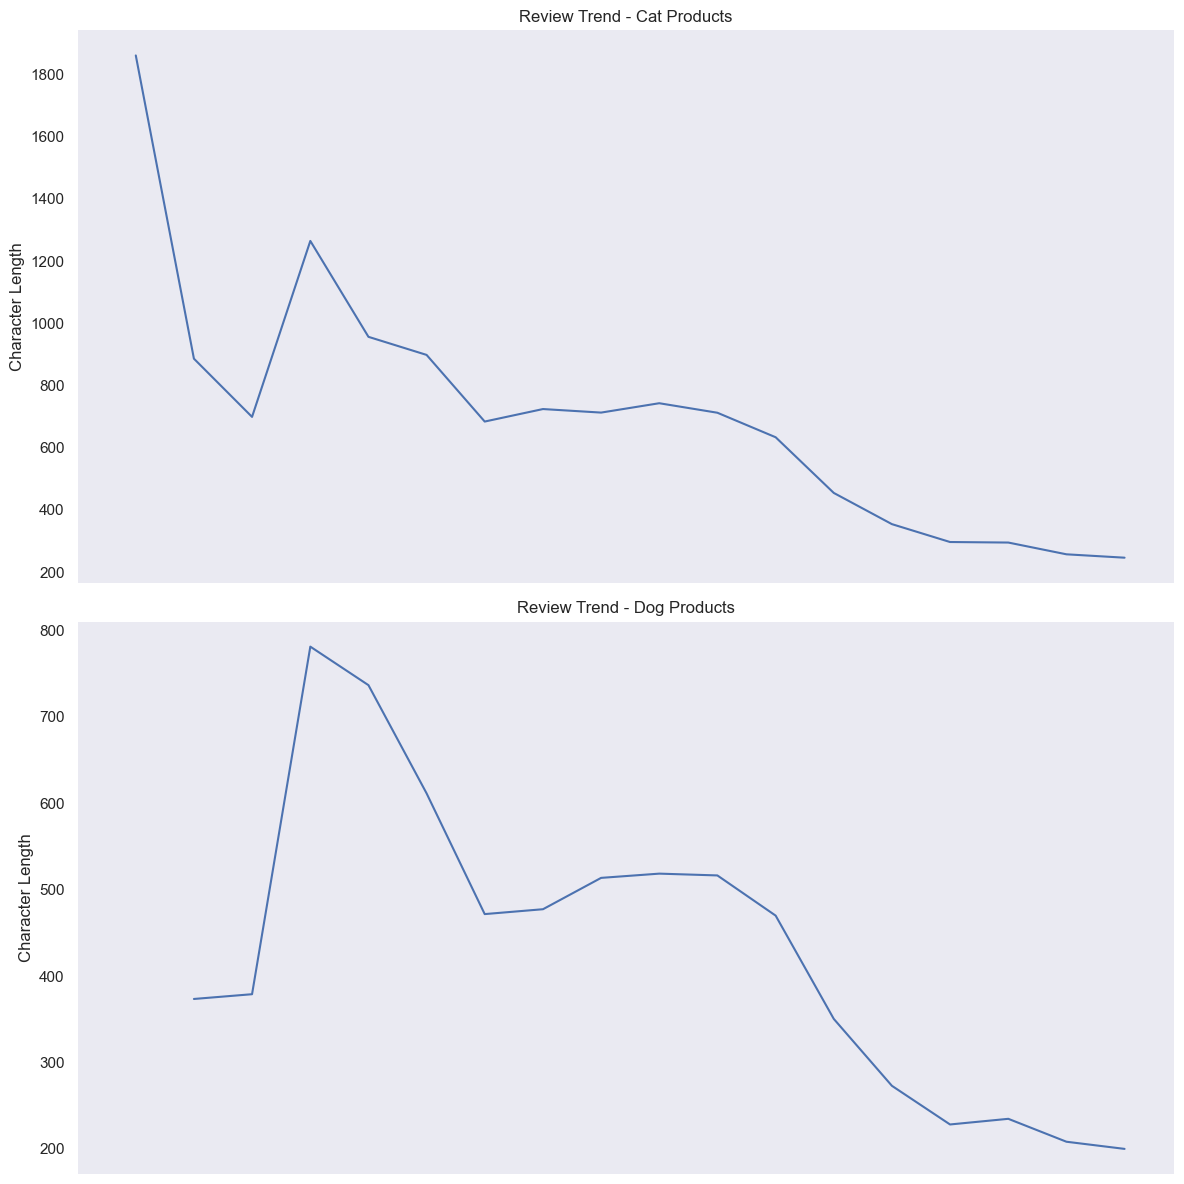

In [320]:
#two graph for review trend cat and dog

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate review length
df['review_length'] = df['clean_review'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create separate dataframes for cat and dog reviews
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Resample by year
cat_yearly_length = cat_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()
dog_yearly_length = dog_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()

# Create the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Cat review length trend
sns.lineplot(data=cat_yearly_length, x='reviewTime', y='review_length', ax=ax1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax1)
ax1.grid(False)
ax1.set_xlabel("")
ax1.set_ylabel("Character Length")
ax1.set_title("Review Trend - Cat Products")

# Dog review length trend
sns.lineplot(data=dog_yearly_length, x='reviewTime', y='review_length', ax=ax2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax2)
ax2.grid(False)
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([x.get_text() for x in ax1.get_xticklabels()], rotation=45)
ax2.set_xlabel("Years")
ax2.set_ylabel("Character Length")
ax2.set_title("Review Trend - Dog Products")

plt.tight_layout()
plt.show()


In [318]:
# Assuming df is your DataFrame

# Save the DataFrame to a CSV file
df.to_csv('PetDat55.csv', index=False)


In [22]:
#save backup
# to undo something or revert to the last saved copy do df = df_copy.copy()

df_copy = df.copy()


In [26]:
df = df_copy.copy()


In [18]:
#check if overall correlates with review

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Select a random sample of 1000 reviews
sample_df = df.sample(n=1000, random_state=42)

# Calculate the average overall rating and average polarity
avg_overall_rating = sample_df['overall'].mean()
avg_polarity = sample_df['score2'].mean()

# Calculate the Pearson correlation coefficient between overall rating and polarity score
corr_coeff, p_value = pearsonr(sample_df['overall'], sample_df['score2'])

print(f"Average Overall Rating: {avg_overall_rating:.2f}")
print(f"Average Polarity: {avg_polarity:.2f}")
print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f"P-Value: {p_value:.3e}")


Average Overall Rating: 4.22
Average Polarity: 0.58
Pearson Correlation Coefficient: 0.540
P-Value: 1.211e-76


In [17]:
df.shape

(1675444, 6)

In [27]:
df.head()

,overall,asin,pet_type,sentiment,clean_review,score2,review_length
reviewTime,,,,,,,
2014-04-16,5.0,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834,177
2014-04-16,5.0,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435,182
2013-03-18,5.0,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880,290
2014-04-16,5.0,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730,184
2014-03-08,5.0,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404,713


In [296]:
df_pd = df.toPandas()

AttributeError: 'DataFrame' object has no attribute 'toPandas'

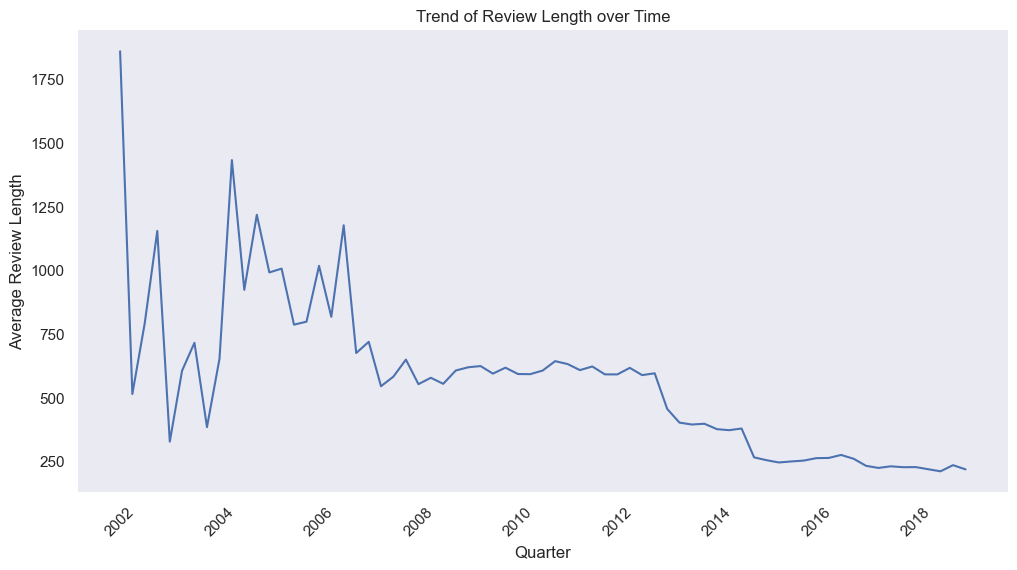

In [322]:
##second trend graph with QQ-YY 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate review length
df['review_length'] = df['clean_review'].apply(len)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Resample by quarter
df_quarterly = df.resample('Q', on='reviewTime')['review_length'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_quarterly, x='reviewTime', y='review_length')
plt.xlabel("Quarter")
plt.ylabel("Average Review Length")
plt.title("Trend of Review Length over Time")

sns.despine(left=True, bottom=True)
plt.grid(False)
plt.xticks(rotation=45)
plt.show()



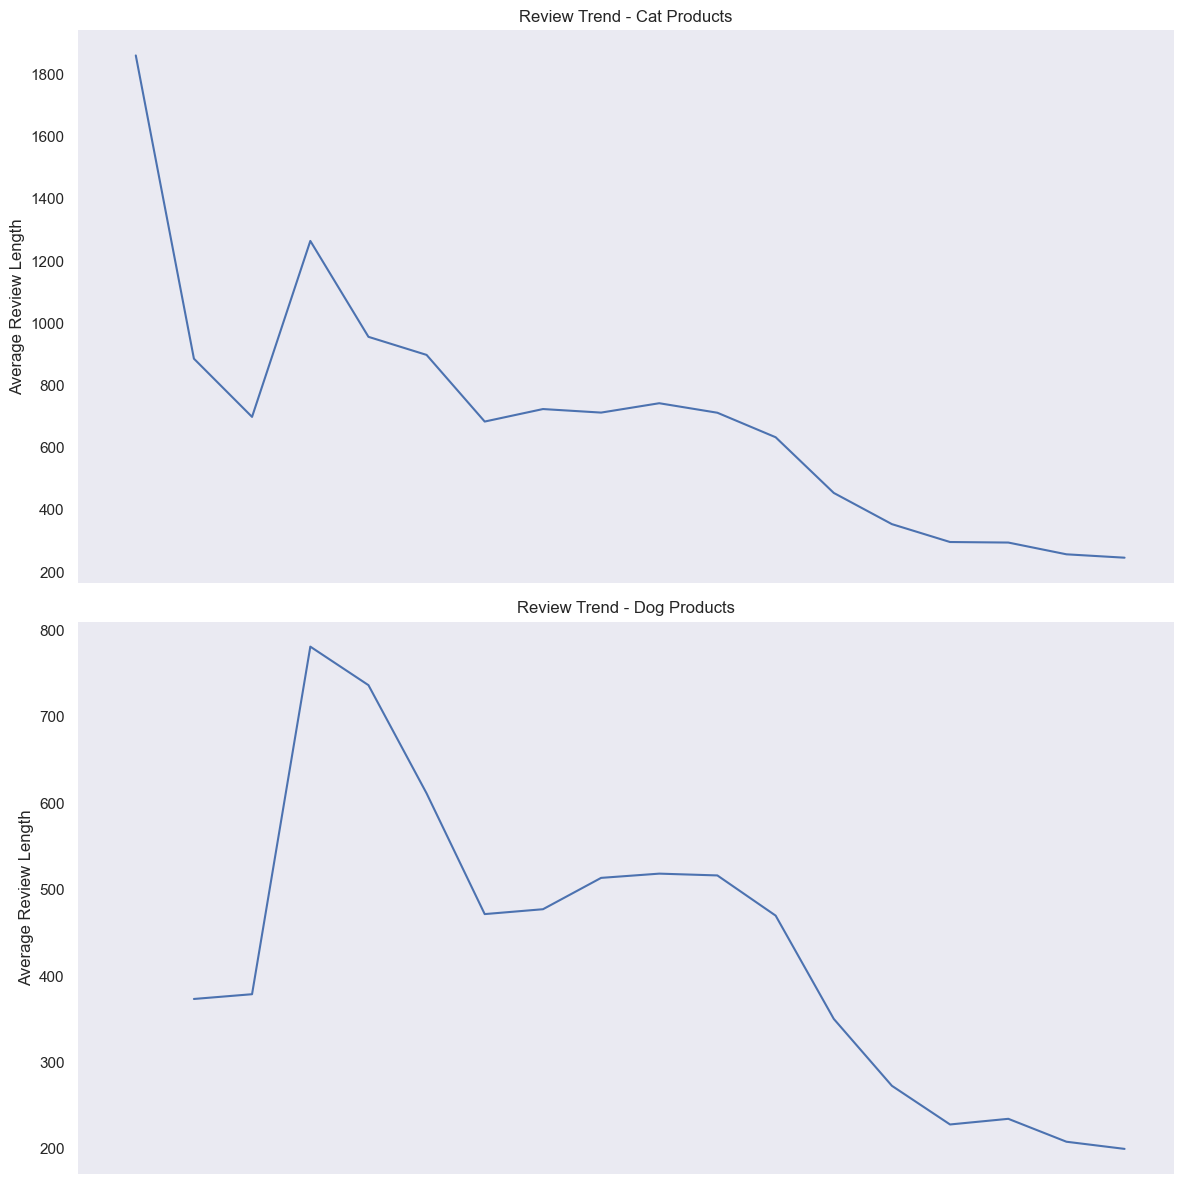

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate review length
df['review_length'] = df['clean_review'].apply(len)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create separate dataframes for cat and dog reviews
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Resample by year
cat_yearly_length = cat_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()
dog_yearly_length = dog_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()

# Create the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

# Cat review length trend
sns.lineplot(data=cat_yearly_length, x='reviewTime', y='review_length', ax=ax1)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax1)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.set_ylabel("Average Review Length")
ax1.set_title("Review Trend - Cat Products")

# Dog review length trend
sns.lineplot(data=dog_yearly_length, x='reviewTime', y='review_length', ax=ax2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax2)
ax2.grid(False)
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels(ax1.get_xticklabels())
ax2.set_xlabel("")
ax2.set_ylabel("Average Review Length")
ax2.set_title("Review Trend - Dog Products")

plt.tight_layout()
plt.show()


In [21]:
df.copy

,overall,asin,pet_type,sentiment,clean_review,score2,review_length
reviewTime,,,,,,,
2014-04-16,5.0,1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834,177
2014-04-16,5.0,1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435,182
2013-03-18,5.0,1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880,290
2014-04-16,5.0,130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730,184
2014-03-08,5.0,130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404,713


In [20]:
# Drop rows with missing values in 'clean_review'
df = df.dropna(subset=['clean_review'])

# Calculate review length
df['review_length'] = df['clean_review'].apply(len)

# Convert reviewTime to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Create separate dataframes for cat and dog reviews
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Resample by year
cat_yearly_length = cat_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()
dog_yearly_length = dog_df.resample('Y', on='reviewTime')['review_length'].mean().reset_index()

# Create the plots
fig, ax = plt.subplots(figsize=(12, 6))

# Cat review length trend
sns.lineplot(data=cat_yearly_length, x='reviewTime', y='review_length', ax=ax, label='Cat Products', color='orange')

# Dog review length trend
sns.lineplot(data=dog_yearly_length, x='reviewTime', y='review_length', ax=ax, label='Dog Products', color='blue')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
sns.despine(left=True, bottom=True, ax=ax)
ax.grid(False)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel("Year")
ax.set_ylabel("Average Review Length")
ax.set_title("Review Trend - Cat and Dog Products")
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\nneka\AppData\Local\Temp\ipykernel_13520\3620161917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['clean_review'].apply(len)


KeyError: 'reviewTime'

In [ ]:
# Format x-axis labels

import matplotlib.dates as mdates

df_quarterly['reviewTime'] = df_quarterly['reviewTime'].dt.to_period('Q').astype(str)
df_quarterly['reviewTime'] = df_quarterly['reviewTime'].apply(lambda x: f"Q{x[-1]}-{x[:4]}")

plt.figure(figsize=(12, 6))
plt.plot(df_quarterly['reviewTime'], df_quarterly['review_length'], linestyle='solid')
plt.title('Trend of Review Length Over Time')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('')
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
#another attempt at plotting trend of review ratings using polarity 'score2'  and 'reviewTime' in quarters, 
#let xlabel be quarters in QQ -YY format and y be polarity. no spine or gridlines. 'reviewTime' column is in datetime format

from pyspark.sql.functions import to_date

df.head()


In [254]:
df2.shape

(1675444, 7)

In [257]:
df2.head()

2014-04-16 00:00:00,5.0,1300450991,0.8834,dog,"Puppy Booster Herbal Supplement for Dogs Puppy Booster Herbal Supplement for Dogs is my puppy best friend, my puppy even as for it every morning. better price than in petco here",Puppy Booster Herbal Supplement for Dogs Puppy Booster Herbal Supplement for Dogs is my puppy best friend my puppy even as for it every morning better price than in petco here,0.8834
reviewTime,,,,,,,
2014-04-16,5.0,1300450991,0.8628,dog,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,0.9435
2013-03-18,5.0,1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ...",puppy booster is perfect for my puppy I love ...,0.9880
2014-04-16,5.0,130045136X,0.9603,cat,powerful protection for the dog immune system ...,powerful protection for the dog immune system ...,0.9730
2014-03-08,5.0,130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...,Dependable seller Amazon is the place to shop...,0.9404
2013-03-18,5.0,130045136X,0.9201,cat,power mune by vet vittals is good for immune s...,power mune by vet vittals is good for immune s...,0.9531


In [256]:
df2.columns = df2.iloc[0]
df2 = df2[1:]

## df2 spoilt, revert to df

In [162]:
rating_counts = df2['overall'].value_counts()
print(rating_counts)

5.0    1101205
4.0     233000
3.0     144914
1.0     108717
2.0      87608
Name: overall, dtype: int64


In [177]:
pet_rating_counts = df2.groupby(['pet_type', 'overall']).size().reset_index(name='counts')
print(pet_rating_counts)

   pet_type  overall  counts
0       cat      1.0   44244
1       cat      2.0   36119
2       cat      3.0   59741
3       cat      4.0   97513
4       cat      5.0  443615
5       dog      1.0   64473
6       dog      2.0   51489
7       dog      3.0   85171
8       dog      4.0  135481
9       dog      5.0  657541
10    other      3.0       2
11    other      4.0       6
12    other      5.0      49


In [193]:
443615+97513+59741+36119+36119

673107

In [191]:
(64473/994155)*100

6.485206029240913

In [192]:
6.5+66.1+5.2+8.6+13.6

99.99999999999999

([<matplotlib.patches.Wedge at 0x1d69dfe72e0>,
 [Text(-0.5299291209321736, 0.9639373043865735, '5 Stars'),
  Text(-0.13786637504508473, -1.0913261944221482, '4 Stars'),
  Text(0.6068106207318643, -0.9174861691420801, '3 Stars'),
  Text(0.9324458401150444, -0.5835621263003188, '2 Stars'),
  Text(1.0778406018027518, -0.21968076180103338, '1 Star')])

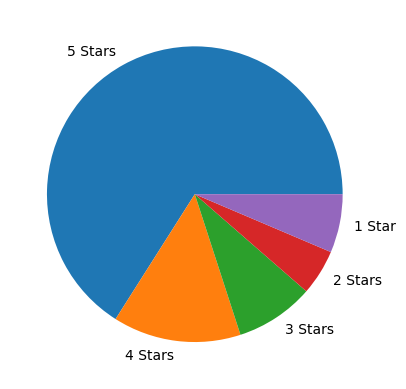

In [174]:
import matplotlib.pyplot as plt
labels = '5 Stars', '4 Stars', '3 Stars', '2 Stars', '1 Star'
sizes = [66, 14, 8.6, 5, 6.4]

explode = (0.1, 0, 0, 0, 0)
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [149]:
#PetData2.to_csv
df2.to_json('PetData2.json', orient='records', lines=True)


In [153]:
dog_count = df2['pet_type'].value_counts().loc['dog']
print(dog_count)


994155


In [168]:
(144914/1675444)*100

8.649289382396546

In [154]:
cat_count = df2['pet_type'].value_counts().loc['cat']
print(cat_count)

681232


In [155]:
994155+681232

1675387

In [217]:
df2.shape

(1675444, 6)

In [310]:
df2.head()

2014-04-16 00:00:00,5.0,1300450991,0.8834,dog,"Puppy Booster Herbal Supplement for Dogs Puppy Booster Herbal Supplement for Dogs is my puppy best friend, my puppy even as for it every morning. better price than in petco here",Puppy Booster Herbal Supplement for Dogs Puppy Booster Herbal Supplement for Dogs is my puppy best friend my puppy even as for it every morning better price than in petco here,0.8834
reviewTime,,,,,,,
2014-04-16,5.0,1300450991,0.8628,dog,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,0.9435
2013-03-18,5.0,1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ...",puppy booster is perfect for my puppy I love ...,0.9880
2014-04-16,5.0,130045136X,0.9603,cat,powerful protection for the dog immune system ...,powerful protection for the dog immune system ...,0.9730
2014-03-08,5.0,130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...,Dependable seller Amazon is the place to shop...,0.9404
2013-03-18,5.0,130045136X,0.9201,cat,power mune by vet vittals is good for immune s...,power mune by vet vittals is good for immune s...,0.9531


In [194]:
# Use regular expression

import re

# Get a bunch of tools from nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nneka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nneka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
# Create an empty list to store the cleaned reviews
cleaned_review = []

# Tidy up the reviews

for review in df2['summary1'].apply(str): 
  # Remove special characters
  review = re.sub("[^a-zA-Z']"," ",review)
  #Remove leading and trailing whitespaces
  review = review.strip()
  #Restrict the length of the string
  if len(review) > 5:
    cleaned_review.append(review)

In [199]:
from collections import Counter
import nltk
from nltk.corpus import opinion_lexicon




In [202]:
# Load the opinion_lexicon
nltk.download('opinion_lexicon')
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Create separate dataframes for 'cat' and 'dog' reviews
cat_reviews = df2[df2['pet_type'] == 'cat']['summary1']
dog_reviews = df2[df2['pet_type'] == 'dog']['summary1']

# Define a function to count positive and negative words

def count_pos_neg_words(reviews):
    pos_word_counter = Counter()
    neg_word_counter = Counter()
    for review in reviews:
        if isinstance(review, str):
            words = nltk.word_tokenize(review)
            for word in words:
                if word in positive_words:
                    pos_word_counter[word] += 1
                elif word in negative_words:
                    neg_word_counter[word] += 1
    return pos_word_counter, neg_word_counter


# Count positive and negative words for 'cat' and 'dog' reviews
cat_pos_words, cat_neg_words = count_pos_neg_words(cat_reviews)
dog_pos_words, dog_neg_words = count_pos_neg_words(dog_reviews)

# Print the top 30 positive and negative words for 'cat' and 'dog' reviews
print('Top 30 positive words in cat reviews:', cat_pos_words.most_common(30))
print('Top 30 negative words in cat reviews:', cat_neg_words.most_common(30))
print('Top 30 positive words in dog reviews:', dog_pos_words.most_common(30))
print('Top 30 negative words in dog reviews:', dog_neg_words.most_common(30))

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\nneka\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Top 30 positive words in cat reviews: [('like', 180863), ('love', 143156), ('great', 128383), ('well', 111042), ('good', 108446), ('loves', 76779), ('easy', 59186), ('works', 58894), ('work', 58733), ('better', 53216), ('clean', 45787), ('enough', 42493), ('nice', 41713), ('recommend', 40979), ('best', 37707), ('happy', 34261), ('top', 33795), ('right', 33104), ('perfect', 28337), ('pretty', 27808), ('likes', 26009), ('sturdy', 21310), ('worth', 20466), ('worked', 20104), ('soft', 20073), ('fine', 20056), ('favorite', 18045), ('loved', 17058), ('cute', 15145), ('easier', 14802)]
Top 30 negative words in cat reviews: [('smell', 42703), ('problem', 26935), ('hard', 23449), ('bad', 20900), ('odor', 18482), ('expensive', 18307), ('issues', 17735), ('problems', 15656), ('waste', 12188), ('smells', 11886), ('issue', 11186), ('crazy', 11113), ('cheap', 10883), ('picky', 10766), ('scratch', 9190), ('mess', 8823), ('difficult', 8619), ('break', 8551), ('dust', 8525), ('disappointed', 6965), ('l

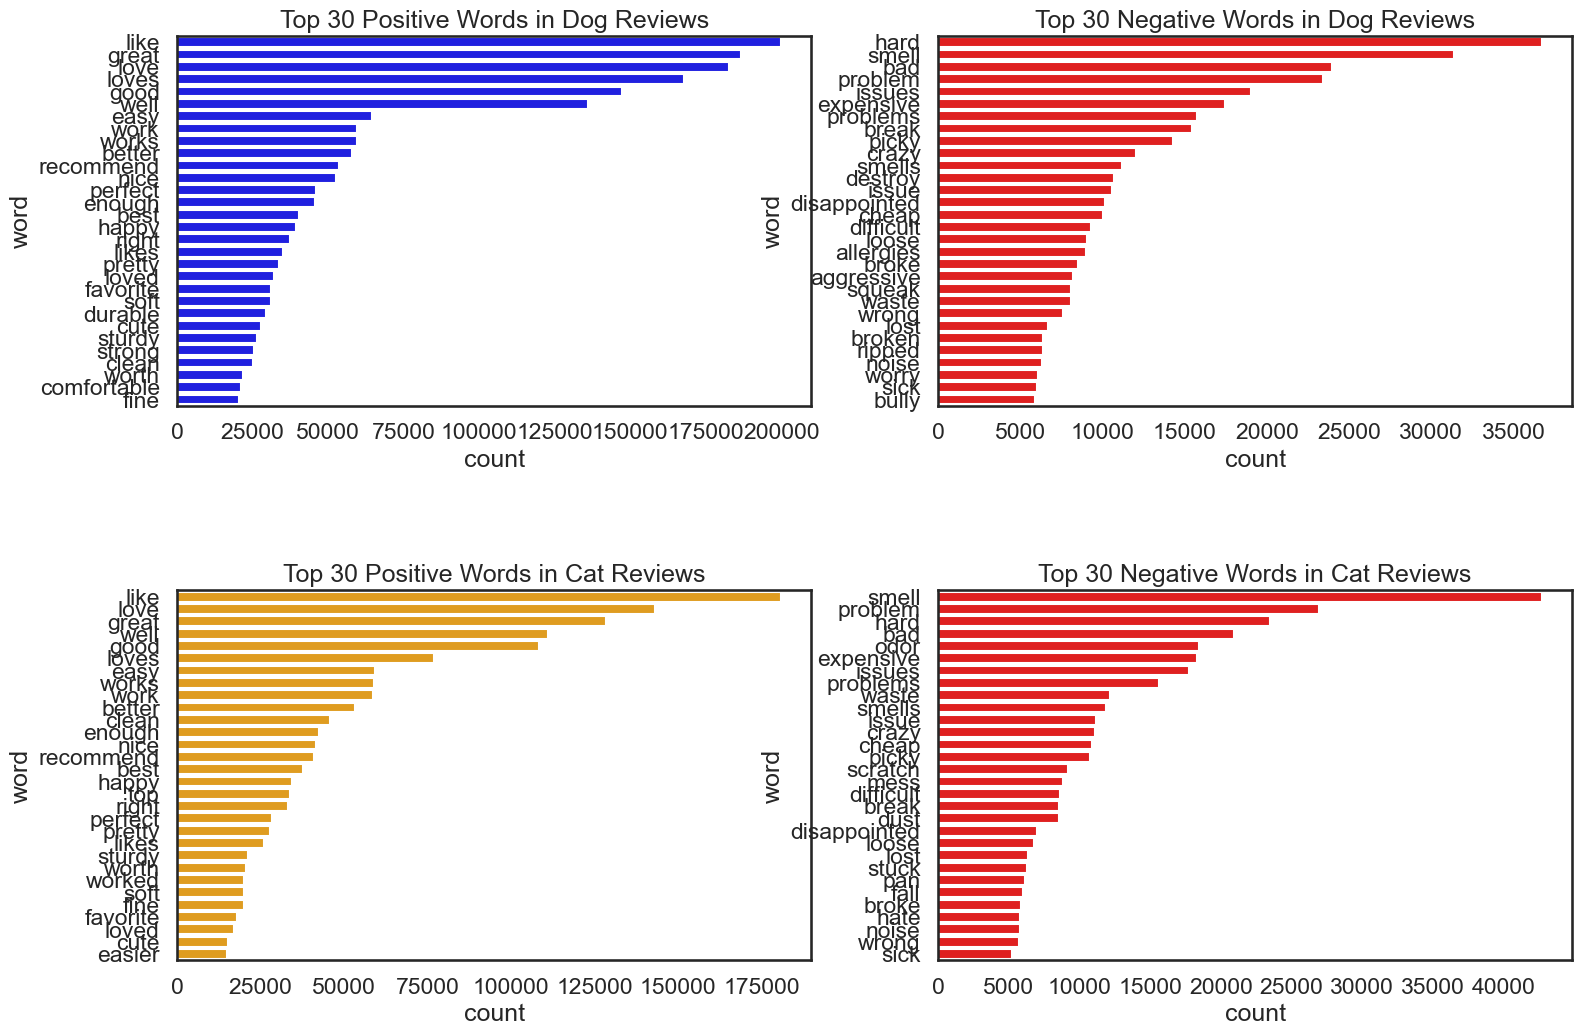

In [233]:
# Import necessary libraries
import pandas as pd

# Convert the Counter objects to DataFrames
cat_pos_df = pd.DataFrame(cat_pos_words.most_common(30), columns=['word', 'count'])
cat_neg_df = pd.DataFrame(cat_neg_words.most_common(30), columns=['word', 'count'])
dog_pos_df = pd.DataFrame(dog_pos_words.most_common(30), columns=['word', 'count'])
dog_neg_df = pd.DataFrame(dog_neg_words.most_common(30), columns=['word', 'count'])

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(ax=axes[0, 0], data=dog_pos_df, x='count', y='word', color='blue').set_title('Top 30 Positive Words in Dog Reviews')
sns.barplot(ax=axes[0, 1], data=dog_neg_df, x='count', y='word', color='red').set_title('Top 30 Negative Words in Dog Reviews')
sns.barplot(ax=axes[1, 0], data=cat_pos_df, x='count', y='word', color='orange').set_title('Top 30 Positive Words in Cat Reviews')
sns.barplot(ax=axes[1, 1], data=cat_neg_df, x='count', y='word', color='red').set_title('Top 30 Negative Words in Cat Reviews')

# Adjust subplots for better layout
plt.subplots_adjust(hspace=0.5)
plt.show()


ValueError: Invalid RGBA argument: 'Reds'

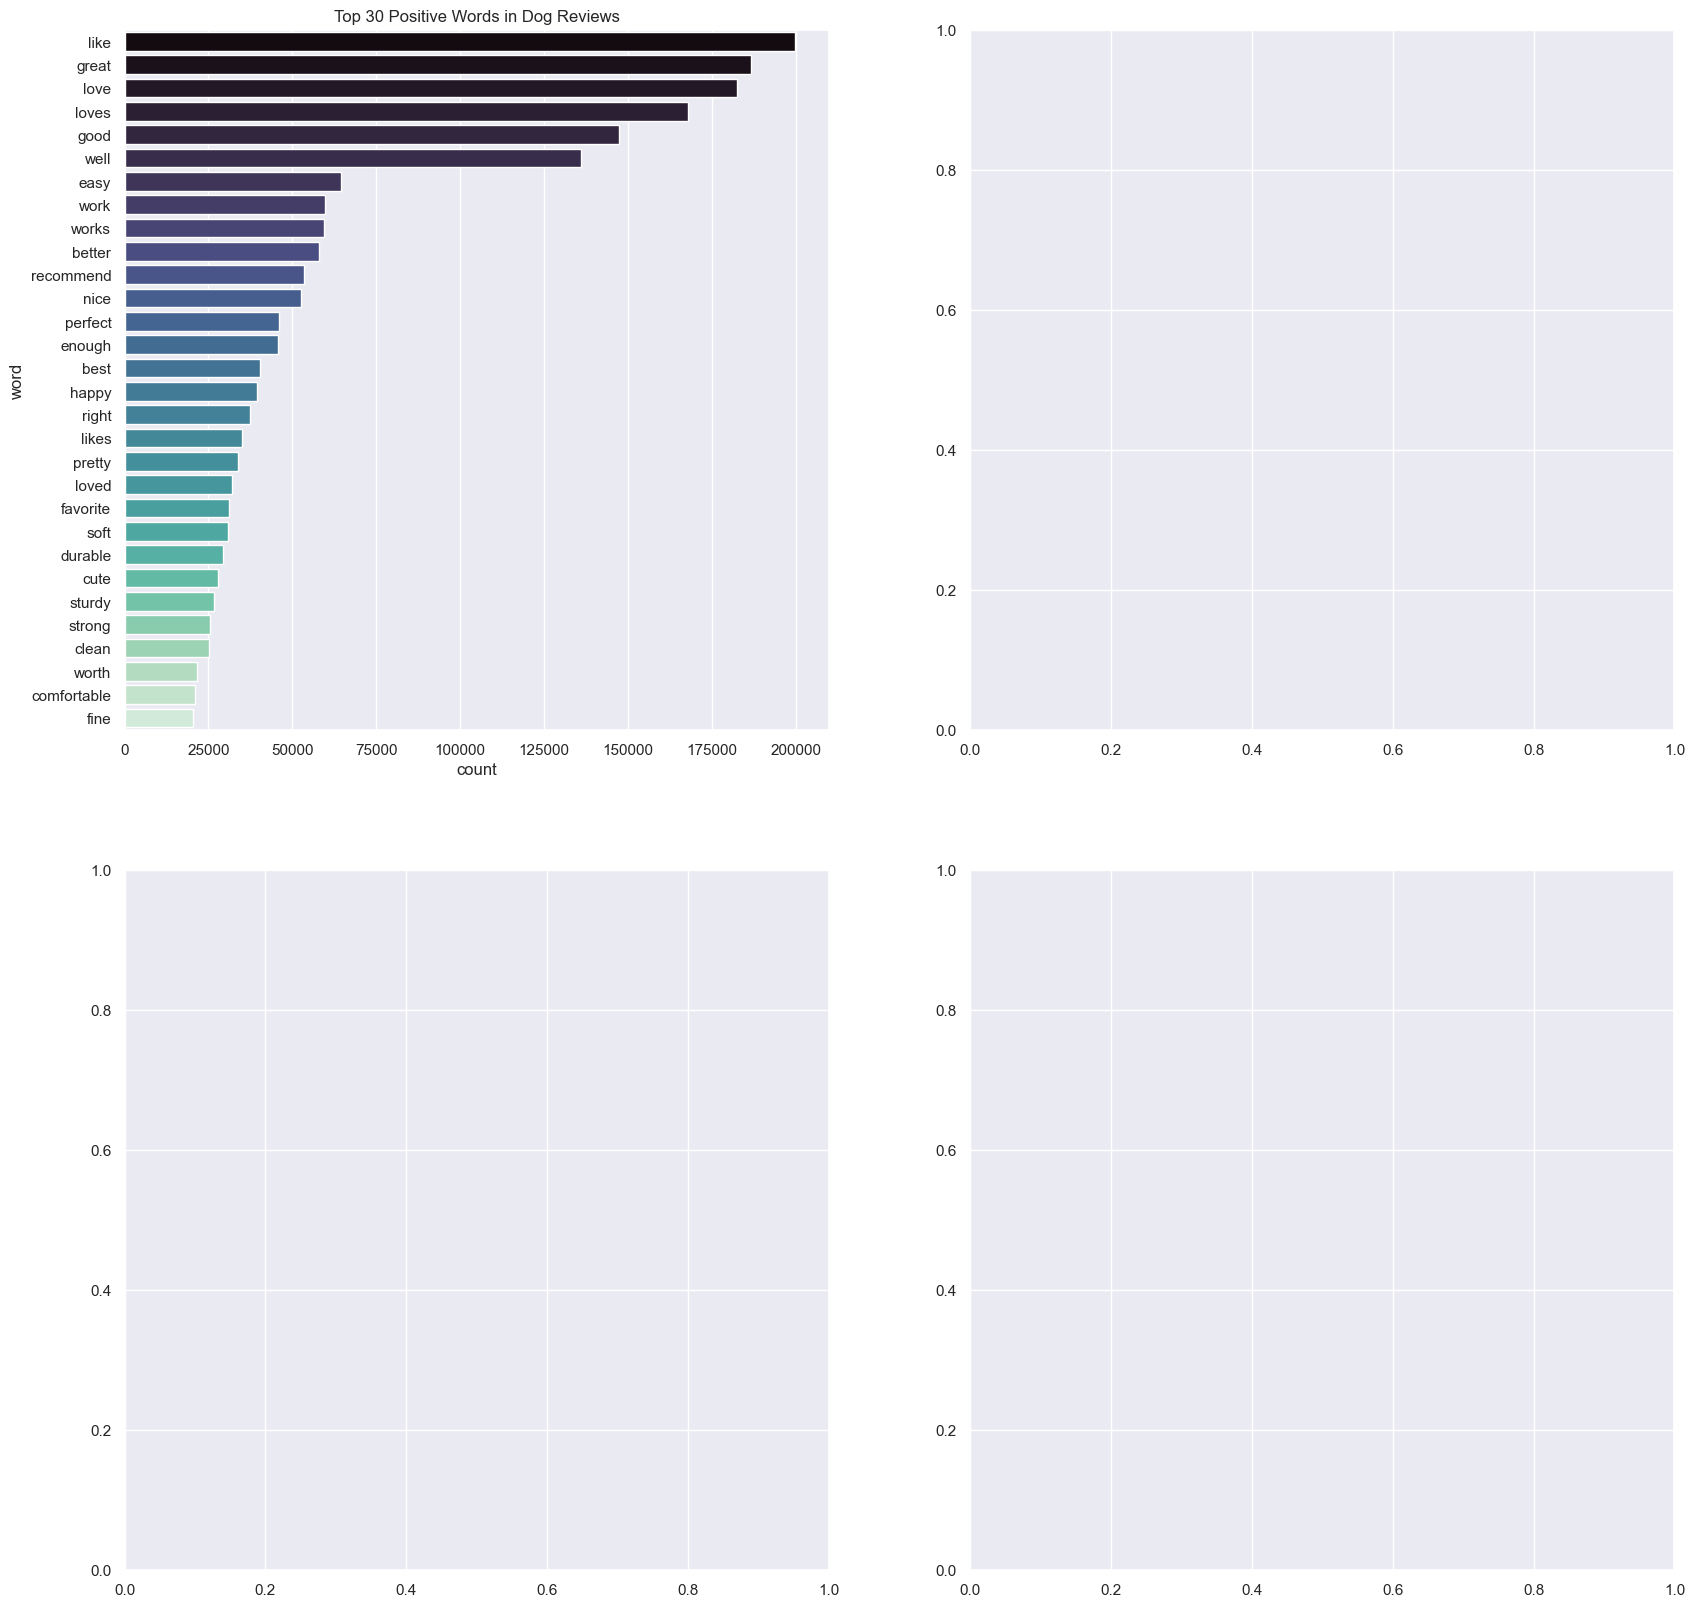

In [243]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Convert the Counter objects to DataFrames
cat_pos_df = pd.DataFrame(cat_pos_words.most_common(30), columns=['word', 'count'])
cat_neg_df = pd.DataFrame(cat_neg_words.most_common(30), columns=['word', 'count'])
dog_pos_df = pd.DataFrame(dog_pos_words.most_common(30), columns=['word', 'count'])
dog_neg_df = pd.DataFrame(dog_neg_words.most_common(30), columns=['word', 'count'])

# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Dog Reviews Positive Words
sns.barplot(ax=axes[0, 0], x='count', y='word', data=dog_pos_df, palette= "mako")
axes[0, 0].set_title('Top 30 Positive Words in Dog Reviews')

# Dog Reviews Negative Words
sns.barplot(ax=axes[0, 1], x='count', y='word', data=dog_neg_df, color='Reds')
axes[0, 1].set_title('Top 30 Negative Words in Dog Reviews')

# Cat Reviews Positive Words
sns.barplot(ax=axes[1, 0], x='count', y='word', data=cat_pos_df, color='Oranges')
axes[1, 0].set_title('Top 30 Positive Words in Cat Reviews')

# Cat Reviews Negative Words
sns.barplot(ax=axes[1, 1], x='count', y='word', data=cat_neg_df, color='Reds')
axes[1, 1].set_title('Top 30 Negative Words in Cat Reviews')

# Display the plot
plt.tight_layout()
plt.show()


In [244]:
df2.head()

,overall,reviewTime,asin,polarity,pet_type,summary1,clean_review,score2
0,5.0,"04 16, 2014",1300450991,0.8834,dog,Puppy Booster Herbal Supplement for Dogs Puppy...,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,0.8628,dog,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ...",puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,0.9603,cat,powerful protection for the dog immune system ...,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...,Dependable seller Amazon is the place to shop...,0.9404


In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your dataframe and 'reviewTime' is in the format 'yyyy-mm-dd'
df2['reviewTime'] = pd.to_datetime(df2['reviewTime'])

# Setting 'reviewTime' as index
df2.set_index('reviewTime', inplace=True)

# Resample to monthly intervals and compute mean sentiment
monthly_sentiment = df2['score2'].resample('M').mean()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sentiment)
plt.title('Polarity Trend')

sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

plt.show()


KeyError: 'reviewTime'

In [252]:
print(df2[' reviewTime'].dtypes)

KeyError: ' reviewTime'

In [253]:
df2.columns()

TypeError: 'Index' object is not callable

## 

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your dataframe and 'reviewTime' is in the format 'yyyy-mm-dd'
df2['reviewTime'] = pd.to_datetime(df2['reviewTime'])

# Setting 'reviewTime' as index
df2.set_index('reviewTime', inplace=True)

# Resample to monthly intervals and compute mean sentiment
monthly_sentiment = df2['polarity'].resample('M').mean()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sentiment)
plt.title('Trend of Sentiment Over Time')
plt.xlabel('Review Time')
plt.ylabel('Average Monthly Sentiment')
plt.show()


KeyError: 'reviewTime'

In [215]:
1296489048 +10600


29648

In [198]:
# Concatenate all the reviews into a single string
all_review = ' '.join(cleaned_review)

# Tokenise into words
myWords = word_tokenize(all_review)

# Need a dictionary of stop words
en_stopwords = set(stopwords.words('english'))

# Remove stop words
# Only keep words with more than 3 letters
# Lowercase the words
myWords_noSW_noCase = [word.lower() for word in myWords if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDist = FreqDist(myWords_noSW_noCase)

# Take a look
fDist.most_common(30)

MemoryError: 

In [13]:
##To analyze product popularity over time, we first need to format the 'reviewTime' column to a datetime object, 
#extract the date, and count the reviews by date for each product. Here is a step by step guide on how to do it:

# assuming df is your dataframe and 'reviewdate andTime' is in 'yyyy-mm-dd hh:mm:ss' format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# count the reviews by date for each product
product_reviews = df.groupby(['asin', 'reviewTime']).size().reset_index(name='review_counts')

product_reviews
##this information is not very useful. streamline to top 10 products overall and then per pet type

,asin,reviewTime,review_counts
0,1300450991,2013-03-18,1
1,1300450991,2014-04-16,4
2,1300450991,2014-09-29,1
3,1300450991,2014-10-20,1
4,1300450991,2014-12-18,1
...,...,...,...
1416355,B01HIQ9NGU,2017-12-27,1
1416356,B01HIQ9NGU,2018-01-20,1
1416357,B01HIQ9NGU,2018-06-01,1
1416358,B01HIQ9NGU,2018-08-17,1


In [17]:
#top 10 products overall
top_10_products = df['asin'].value_counts().head(10).index

# Then, filter the original DataFrame to only include rows where the productID is in the top 10 and the pet type is either 'cat' or 'dog'
top_10_products_df = df[df['asin'].isin(top_10_products) & df['pet_type'].isin(['cat', 'dog'])]

# Now, group by productID and pet_type and count the number of rows for each group
top_10_products_pet_type = top_10_products_df.groupby(['asin', 'pet_type']).size()

print(top_10_products_pet_type)

asin        pet_type
B0002DHXX2  cat         3914
B0002H3ZLM  cat          113
            dog         3131
B0002I0O5G  cat          137
            dog         3687
B0009YD8OC  cat          228
            dog         6277
B000OX89XI  cat          238
            dog         5014
B000W5QSYA  cat          197
            dog         6492
B0012NV9NQ  cat          213
            dog         5692
B0013MVJPY  cat          235
            dog         6148
B00176CT5U  cat          118
            dog         5226
B001A5IXRG  cat          213
            dog         5694
dtype: int64


In [27]:
cat_products_df = df[df['pet_type'] == 'cat']

# Find the top 10 product IDs for cats
top_10_cat_products = cat_products_df['asin'].value_counts().head(10)

print(top_10_cat_products)

B0002DHXX2    3914
B00164YL22    3222
B000084EEF    2678
B0002DHV16    2513
B008PNN8DK    2485
B001411SK0    2387
B000L3XYZ4    2291
B000UGB9EA    2205
B00BSYR7K8    2140
B000634MH8    2119
Name: asin, dtype: int64


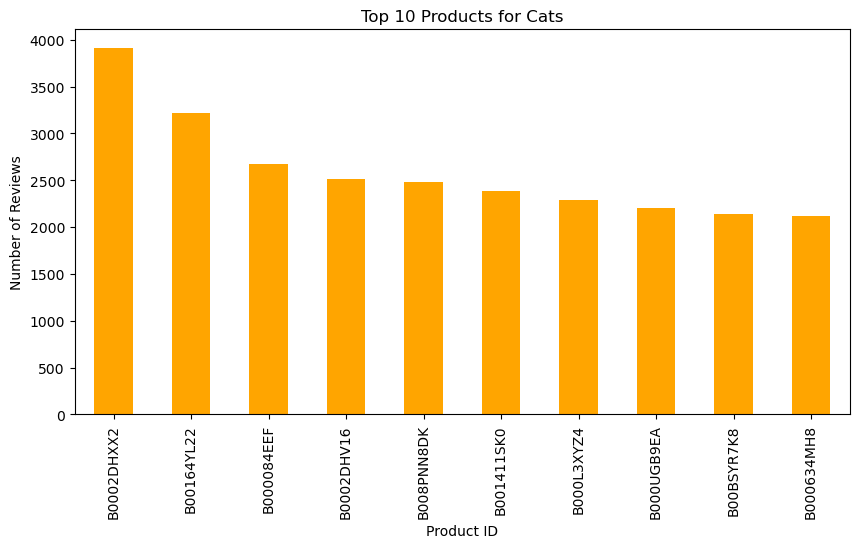

In [28]:
#show top 10 products per pet type in separate bar charts

plt.figure(figsize=(10,5))
top_10_cat_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products for Cats')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
dog_products_df = df[df['pet_type'] == 'dog']

# Find the top 10 product IDs for dogs
top_10_dog_products = dog_products_df['asin'].value_counts().head(10)

print(top_10_dog_products)

B000W5QSYA    6492
B0009YD8OC    6277
B0013MVJPY    6148
B001A5IXRG    5694
B0012NV9NQ    5692
B00176CT5U    5226
B000OX89XI    5014
B0002I0O5G    3687
B0002H3ZLM    3131
B000BQN9LA    2864
Name: asin, dtype: int64


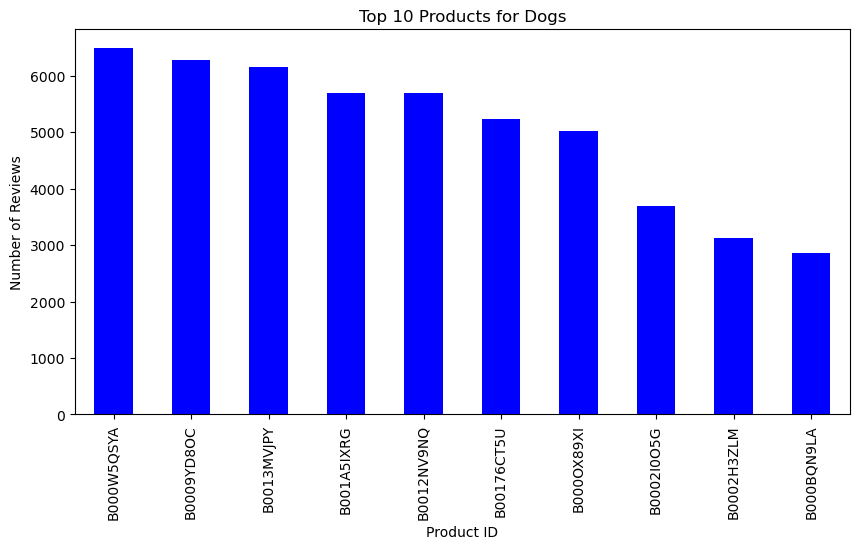

In [29]:


# Then, create the plots for the top 10 products for dogs
plt.figure(figsize=(10,5))
top_10_dog_products.plot(kind='bar', color='blue')
plt.title('Top 10 Products for Dogs')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()

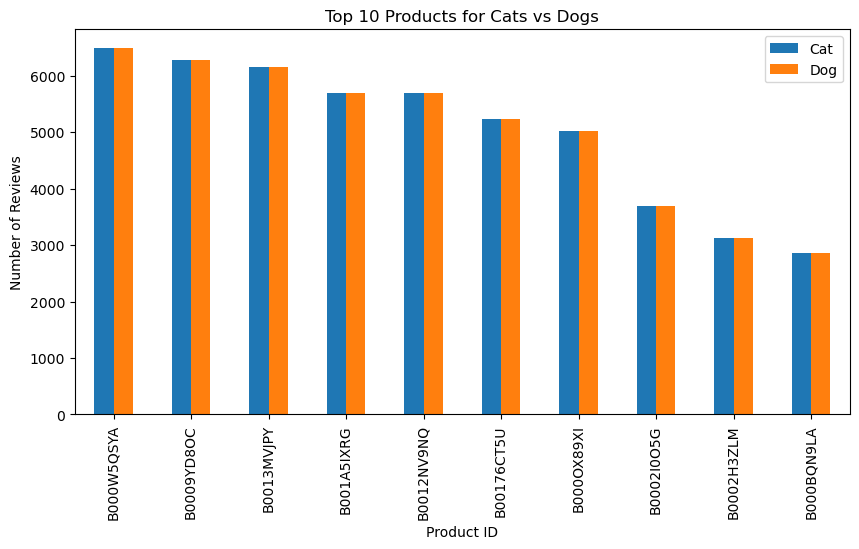

In [22]:
#show top 10 products per pet type on same bar chart
#this is goving inaccurate result. everything is mirroring the dog results

combined_data = pd.concat([top_10_cat_products, top_10_dog_products], axis=1)
combined_data.columns = ['Cat', 'Dog']

# Create the bar chart
combined_data.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Products for Cats vs Dogs')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()

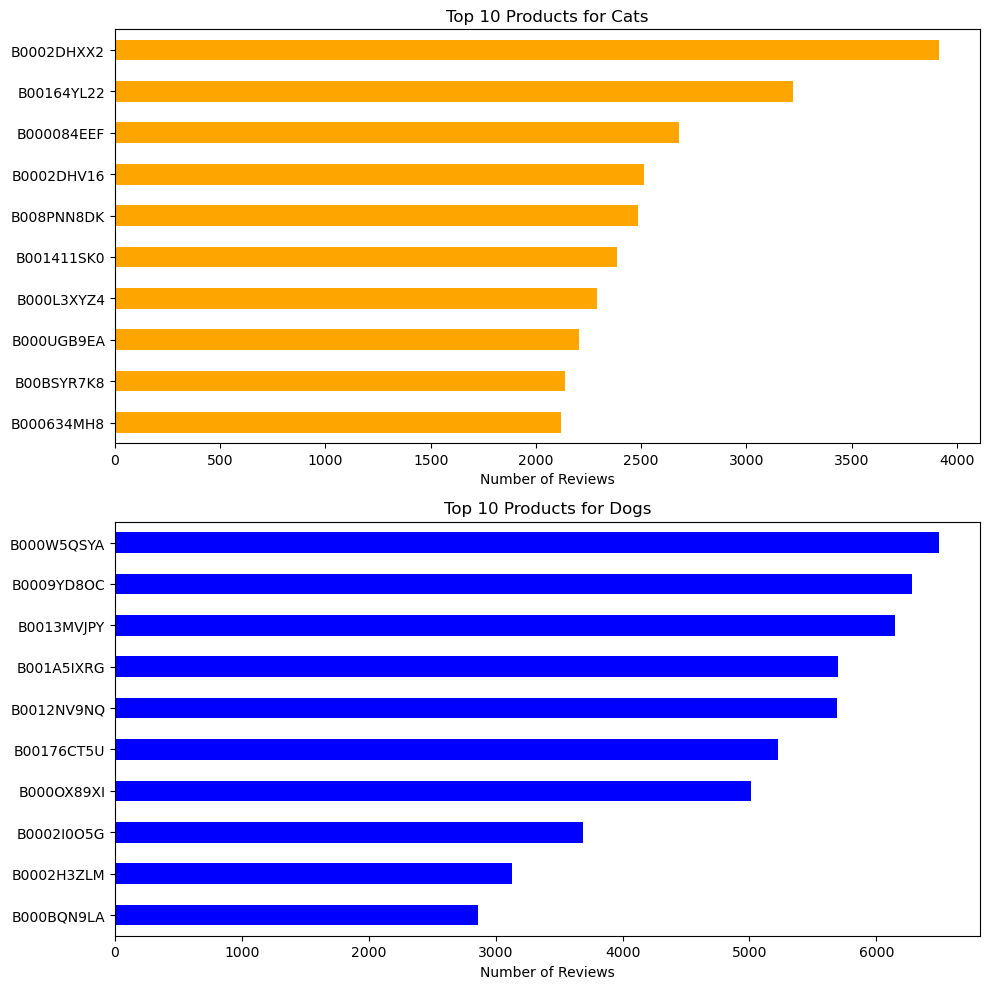

In [30]:
#do two subplots with cat on top and dog

fig, ax = plt.subplots(2, 1, figsize=(10,10)) 

# Top 10 products for Cats
top_10_cat_products.plot(kind='barh', ax=ax[0], color='orange', legend=False)
ax[0].set_title('Top 10 Products for Cats')
ax[0].set_xlabel('Number of Reviews')
ax[0].invert_yaxis()

# Top 10 products for Dogs
top_10_dog_products.plot(kind='barh', ax=ax[1], color='blue', legend=False)
ax[1].set_title('Top 10 Products for Dogs')
ax[1].set_xlabel('Number of Reviews')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [31]:
cat_df = df[df['pet_type'] == 'cat']

# Find the top 10 product IDs for cats
top5cat = cat_df['asin'].value_counts().head(5)

print(top5cat)

B0002DHXX2    3914
B00164YL22    3222
B000084EEF    2678
B0002DHV16    2513
B008PNN8DK    2485
Name: asin, dtype: int64


In [32]:
dog_df = df[df['pet_type'] == 'dog']

# Find the top 10 product IDs for dogs
top5dog = dog_df['asin'].value_counts().head(5)

print(top5cat)

B0002DHXX2    3914
B00164YL22    3222
B000084EEF    2678
B0002DHV16    2513
B008PNN8DK    2485
Name: asin, dtype: int64


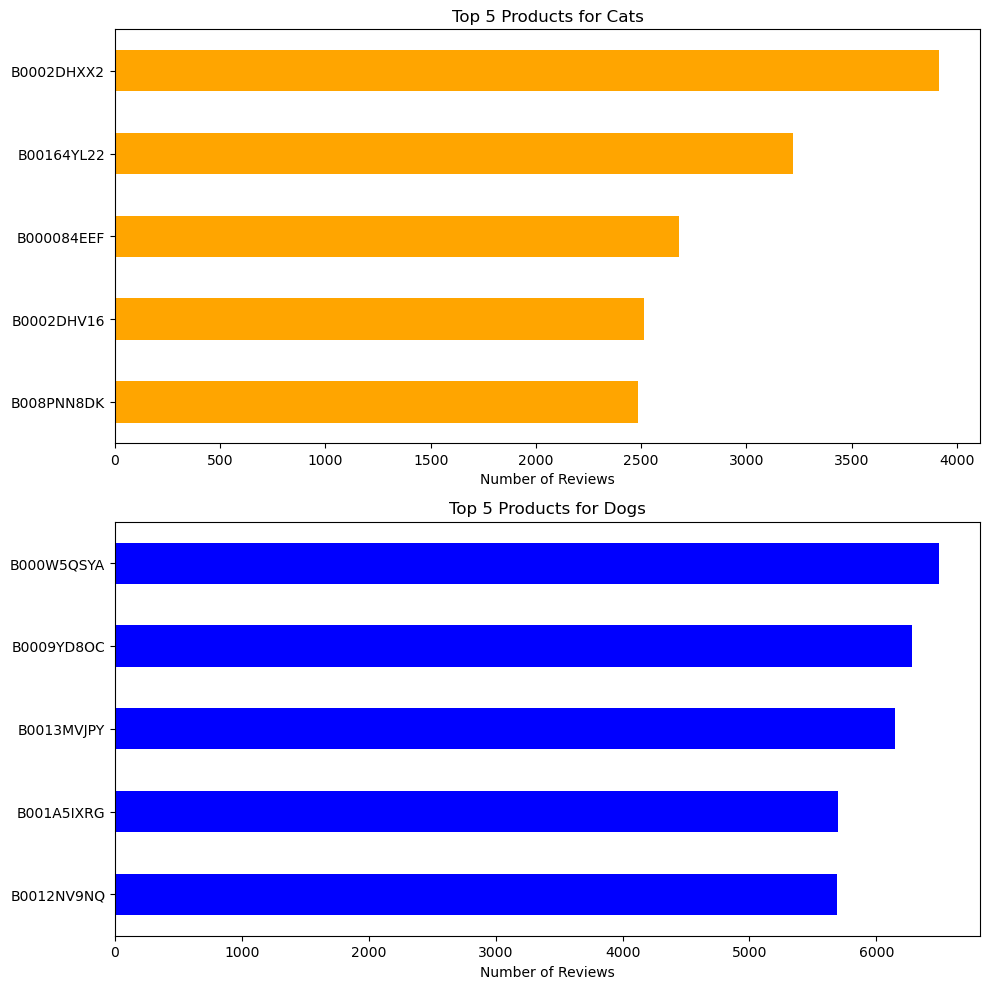

In [33]:
#do subplots for top 5 products

fig, ax = plt.subplots(2, 1, figsize=(10,10)) 

# Top 10 products for Cats
top5cat.plot(kind='barh', ax=ax[0], color='orange', legend=False)
ax[0].set_title('Top 5 Products for Cats')
ax[0].set_xlabel('Number of Reviews')
ax[0].invert_yaxis()

# Top 10 products for Dogs
top5dog.plot(kind='barh', ax=ax[1], color='blue', legend=False)
ax[1].set_title('Top 5 Products for Dogs')
ax[1].set_xlabel('Number of Reviews')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [ ]:
# Ensure the productID columns in both dataframes are of the same type
product_brands['productID'] = product_brands['productID'].astype(str)
top_10_cat_products['productID'] = top_10_cat_products['productID'].astype(str)
top_10_dog_products['productID'] = top_10_dog_products['productID'].astype(str)

# Now, you can merge
top_10_cat_products = pd.merge(top_10_cat_products, product_brands, on='productID', how='left')
top_10_dog_products = pd.merge(top_10_dog_products, product_brands, on='productID', how='left')


In [41]:
df.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary',
       'category', 'title', 'brand', 'main_cat', 'polarity', 'pet_type',
       'sentiment'],
      dtype='object')

In [ ]:
top_10_cat_products = pd.merge(top_10_cat_products, product_brands, on='productID', how='left')
top_10_dog_products = pd.merge(top_10_dog_products, product_brands, on='productID', how='left')

In [44]:
product_brands = df[['asin', 'brand']].drop_duplicates()

In [46]:
# First, get the top 10 products for cat and dog
top5cat = df[df['pet_type'] == 'cat']['asin'].value_counts().head(5)
top5dog = df[df['pet_type'] == 'dog']['asin'].value_counts().head(5)

# Convert these Series to DataFrames and reset the index
top5cat = top5cat.reset_index()
top5dog = top5dog.reset_index()

# Rename the columns
top5cat.columns = ['asin', 'count']
top5dog.columns = ['asin', 'count']

# Ensure the productID columns in both dataframes are of the same type
product_brands['asin'] = product_brands['asin'].astype(str)
top5cat['asin'] = top5cat['asin'].astype(str)
top5dog['asin'] = top5dog['asin'].astype(str)

# Merge the product brands with your top 10 products DataFrame
top5cat = pd.merge(top5cat, product_brands, on='asin', how='left')
top5dog = pd.merge(top5dog, product_brands, on='asin', how='left')

# Now, you can plot your charts with the brands on the x-axis


In [47]:
top5cat.head()

,asin,count,brand
0,B0002DHXX2,3914,MidWest Homes for Pets
1,B00164YL22,3222,Purina Fortiflora
2,B000084EEF,2678,Bergan
3,B0002DHV16,2513,Cat Dancer
4,B008PNN8DK,2485,Greenies


In [48]:
top5dog.head()

,asin,count,brand
0,B000W5QSYA,6492,Taste of the Wild
1,B0009YD8OC,6277,PetSafe
2,B0013MVJPY,6148,Puppia
3,B001A5IXRG,5694,Puppia
4,B0012NV9NQ,5692,Puppia


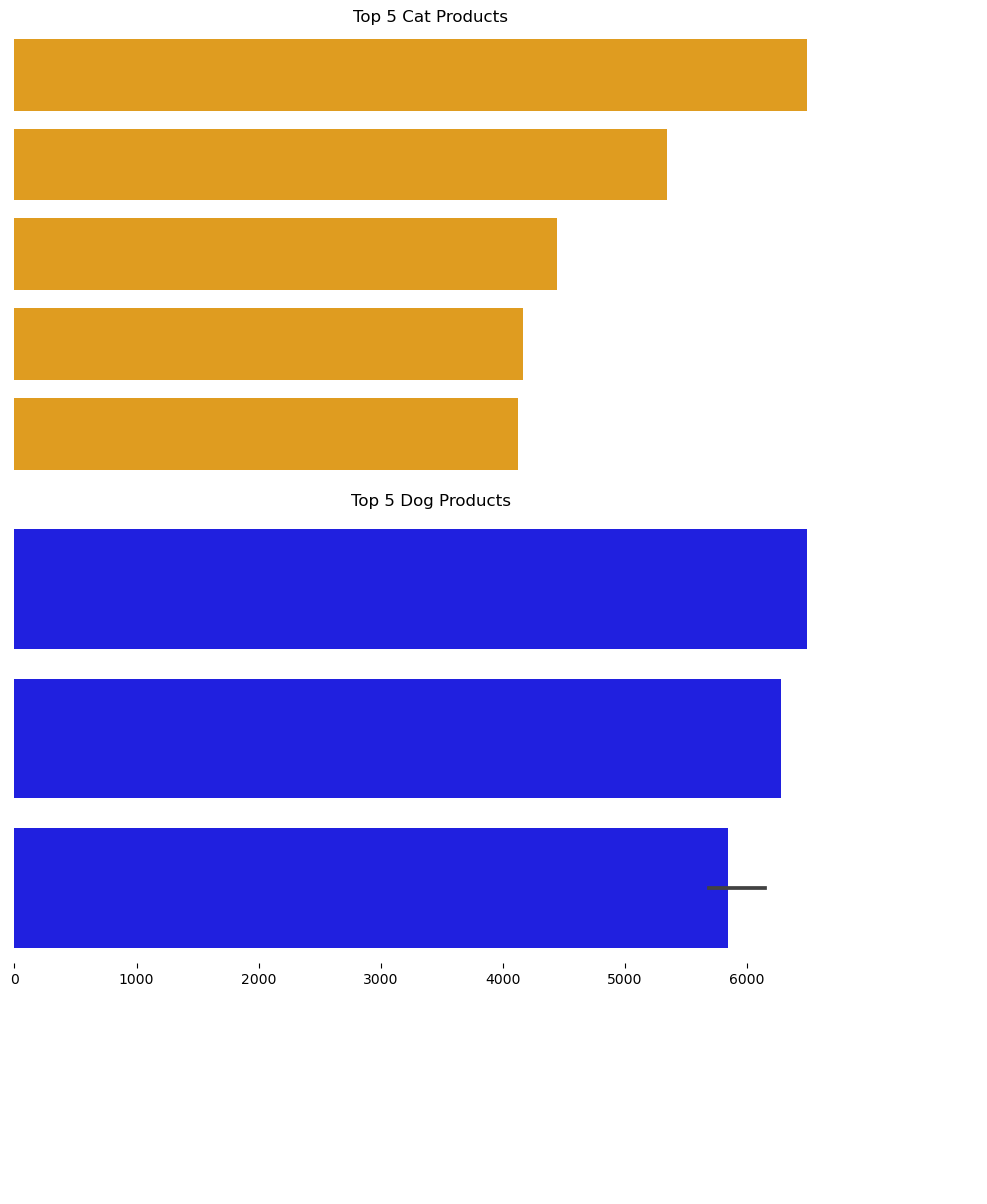

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for top 5 cat products
sns.barplot(x='count', y='brand', data=top5cat, ax=axs[0], color='orange')
axs[0].set_title('Top 5 Cat Products')
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].get_xaxis().set_visible(False)# Set empty x-label
for i, v in enumerate(top5cat['brand']):
    axs[0].text(top5cat.loc[i, 'count'] + 10, i, v, color='white', va="center")

# Plot for top 5 dog products
sns.barplot(x='count', y='brand', data=top5dog, ax=axs[1], color='blue')
axs[1].set_title('Top 5 Dog Products')
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].set_xlabel('') # Set empty x-label
for i, v in enumerate(top5dog['brand']):
    axs[1].text(top5dog.loc[i, 'count'] + 10, i, v, color='white', va="center")

plt.tight_layout()
plt.show()


In [57]:
df.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary',
       'category', 'title', 'brand', 'main_cat', 'polarity', 'pet_type',
       'sentiment'],
      dtype='object')

In [58]:
# distribution of overall ratings 

rating_counts = df['overall'].value_counts()

# Print the counts
print(rating_counts)

5.0    1101205
4.0     233000
3.0     144914
1.0     108717
2.0      87608
Name: overall, dtype: int64


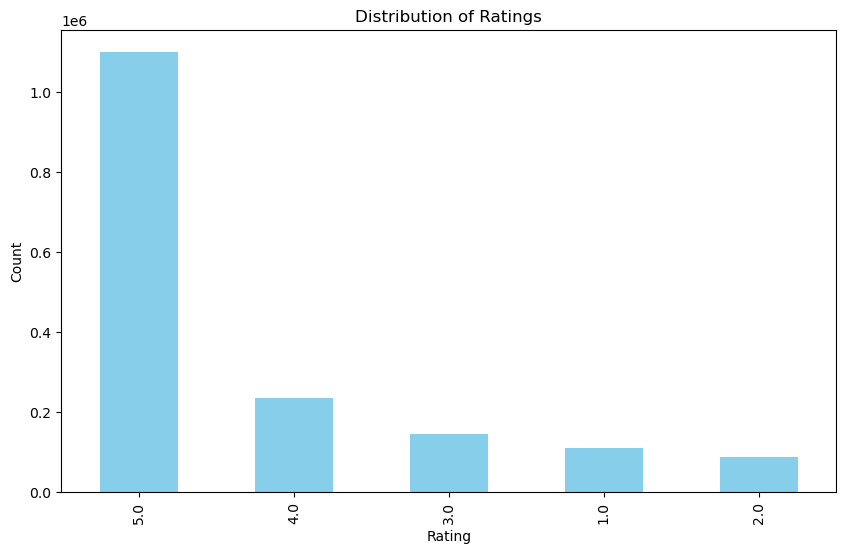

In [59]:
rating_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set the title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Display the plot
plt.show()
#This will create a bar chart that displays the number of occurrences of each rating in the 'overall' column. 
#Replace 'df' with the name of your DataFrame.








In [60]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

NameError: name 'plot_colortable' is not defined

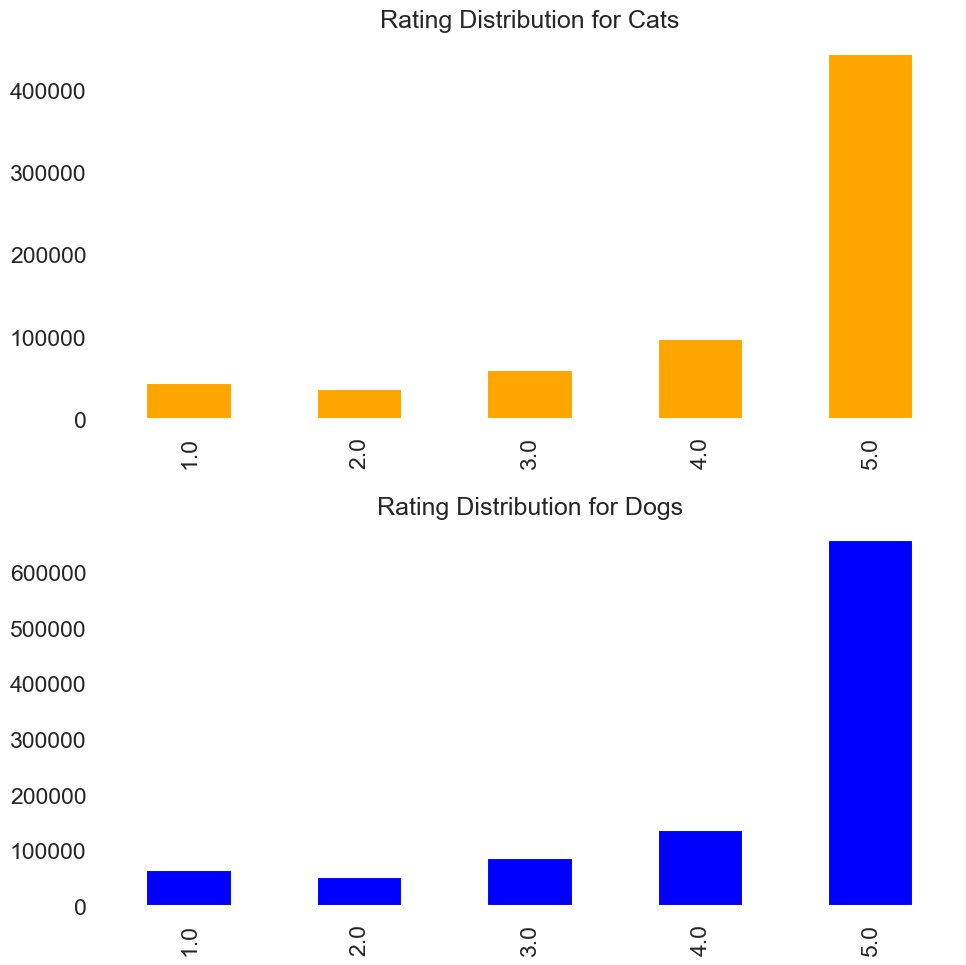

In [231]:
# Filter DataFrame for cats and dogs
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Get rating counts for cats and dogs
cat_ratings = cat_df['overall'].value_counts()
dog_ratings = dog_df['overall'].value_counts()

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot for Cats
cat_ratings.sort_index().plot(kind='bar', ax=axs[0], color='orange')
axs[0].set_title('Rating Distribution for Cats')

# Remove spines and outline
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Plot for Dogs
dog_ratings.sort_index().plot(kind='bar', ax=axs[1], color='blue')
axs[1].set_title('Rating Distribution for Dogs')

# Remove spines and outline
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()


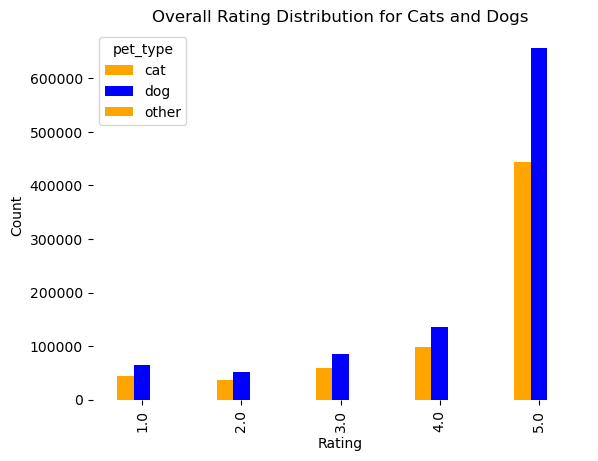

In [63]:
# Group by 'pet_type' and 'overall' and get the size of each group
ratings_distribution = df.groupby(['pet_type', 'overall']).size().unstack()

# Plot the distribution as a bar chart
ax = ratings_distribution.T.plot(kind='bar', color=['orange', 'blue'], edgecolor='none')

# Set the chart's title and labels
ax.set_title('Overall Review Distribution for Cats and Dogs')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Display the plot
plt.show()


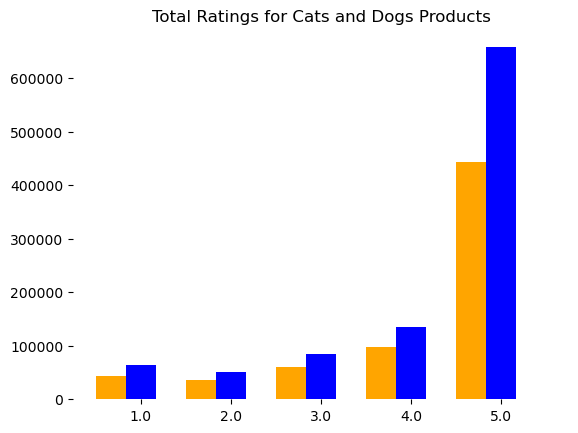

In [69]:
# Group by 'pet_type' and 'overall' and get the size of each group
ratings_distribution = df.groupby(['pet_type', 'overall']).size().unstack()

# Plot the distribution as a bar chart
ax = ratings_distribution.T.plot(kind='bar', color=['orange', 'blue'], edgecolor='none', width=1.0)

# Remove the chart's title and labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Ratings for Cats and Dogs Products')

# Remove the legend
ax.get_legend().remove()

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Display the plot
plt.show()


In [73]:
df.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary',
       'category', 'title', 'brand', 'main_cat', 'polarity', 'pet_type',
       'sentiment'],
      dtype='object')

In [77]:
from nltk.corpus import PlaintextCorpusReader, stopwords

corpus_root = 'PetData_dogcat1.csv'
corpus = PlaintextCorpusReader(corpus_root, '.*\.txt')

stop_words = set(stopwords.words('english'))

for fileid in corpus.fileids():
    words = [word for word in corpus.raw(fileid).split() if word.lower() not in stop_words]
    print(words)


In [80]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nneka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [144]:
df.tail()

,overall,reviewTime,reviewerID,asin,reviewText,summary,category,title,brand,main_cat,polarity,pet_type,sentiment,summary1
1675439,5.0,"05 29, 2017",A1BCEUIT9DJWFG,B01HIPJRBM,Great product,Five Stars,"['Pet Supplies', 'Cats', 'Flea & Tick Control'...",#1 Pet Flea Comb For Dogs And Cats By Pet's Mu...,Pet's Mum,Pet Supplies,0.6249,cat,positive,Five Stars Great product
1675440,4.0,"04 30, 2017",A2DFUIH816QG9D,B01HIPJRBM,Great price for this comb! It works pretty wel...,Great price for this comb,"['Pet Supplies', 'Cats', 'Flea & Tick Control'...",#1 Pet Flea Comb For Dogs And Cats By Pet's Mu...,Pet's Mum,Pet Supplies,0.9417,cat,positive,Great price for this comb Great price for this...
1675441,5.0,"09 29, 2018",A2M9GBUPEVJ5F7,B01HIQ9NGU,Seems to be a good substitute for the very cos...,Very good product and at a gored price.,"['Pet Supplies', 'Dogs', 'Health Supplies', 'S...",VetOne Advita Probiotic Nutritional Supplement...,Vet One,Pet Supplies,0.8024,dog,positive,Very good product and at a gored price. Seems ...
1675442,5.0,"08 17, 2018",A3G9N735AIK8QK,B01HIQ9NGU,Our 2 year old German Shorthaired Pointer has ...,Helped with my pup's persistent diarrhea after...,"['Pet Supplies', 'Dogs', 'Health Supplies', 'S...",VetOne Advita Probiotic Nutritional Supplement...,Vet One,Pet Supplies,0.9599,dog,positive,Helped with my pup's persistent diarrhea after...
1675443,4.0,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,"It did no harm, but hard to see any improvemen...",Four Stars,"['Pet Supplies', 'Dogs', 'Health Supplies', 'S...",VetOne Advita Probiotic Nutritional Supplement...,Vet One,Pet Supplies,0.1406,dog,neutral,"Four Stars It did no harm, but hard to see any..."


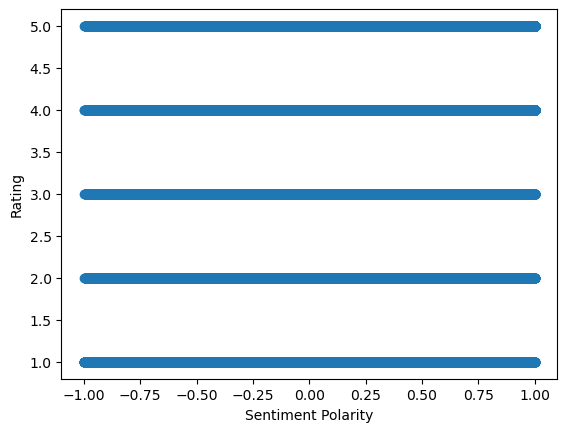

In [82]:
#create scatter plot to assess relationship between polarity and overall rating
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['polarity'], df['overall'])

# Add axis labels
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')

# Show the plot
plt.show()

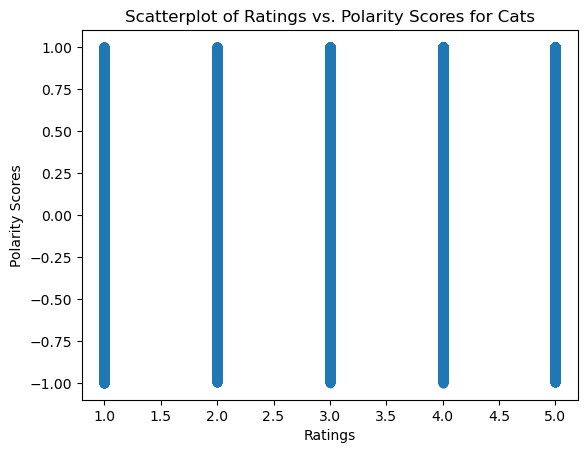

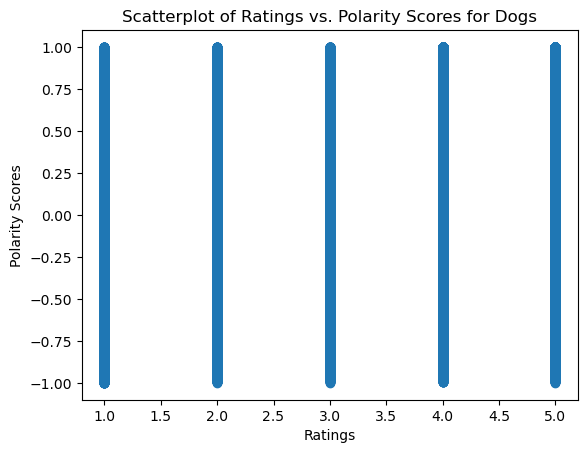

In [83]:

# Create separate dataframes for cat and dog data
cat_df = df[df['pet_type'] == 'cat']
dog_df = df[df['pet_type'] == 'dog']

# Plot scatterplot for cat data
plt.scatter(cat_df['overall'], cat_df['polarity'])
plt.title('Scatterplot of Ratings vs. Polarity Scores for Cats')
plt.xlabel('Ratings')
plt.ylabel('Polarity Scores')
plt.show()

# Plot scatterplot for dog data
plt.scatter(dog_df['overall'], dog_df['polarity'])
plt.title('Scatterplot of Ratings vs. Polarity Scores for Dogs')
plt.xlabel('Ratings')
plt.ylabel('Polarity Scores')
plt.show()

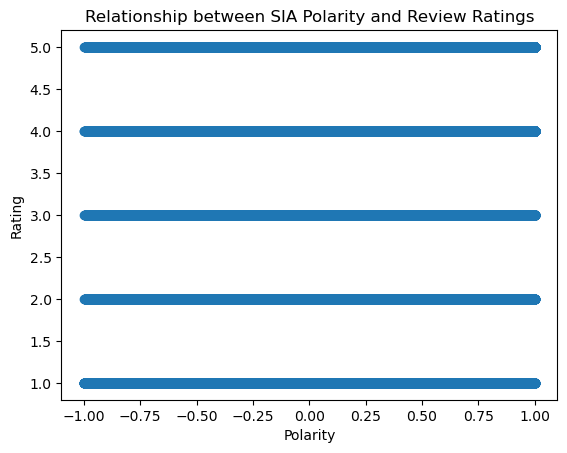

In [84]:
import matplotlib.pyplot as plt

# Create a scatter plot with sia_polarity on the x-axis and overall rating on the y-axis
plt.scatter(df['polarity'], df['overall'])

# Set the x-axis label
plt.xlabel('Polarity')

# Set the y-axis label
plt.ylabel('Rating')

# Set the plot title
plt.title('Relationship between SIA Polarity and Review Ratings')

# Display the plot
plt.show()


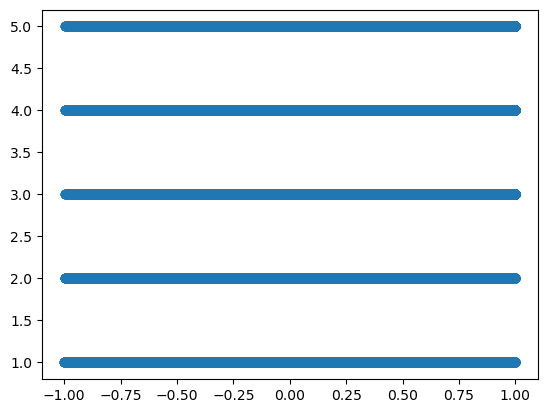

In [88]:
import matplotlib.pyplot as plt

x = df['polarity']
y = df['overall']

plt.scatter(x, y)
plt.show()

In [86]:
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

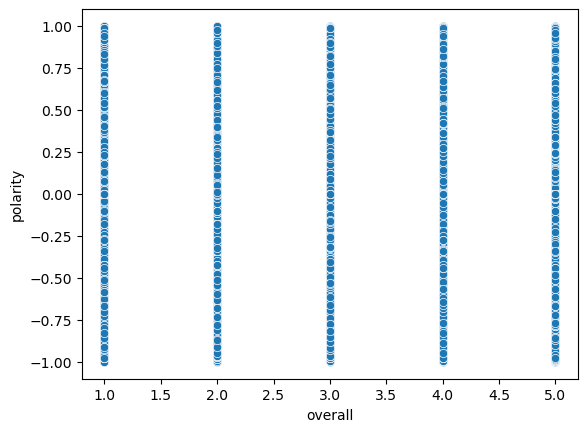

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, y='polarity', x='overall')
plt.show()

<AxesSubplot: xlabel='overall', ylabel='polarity'>

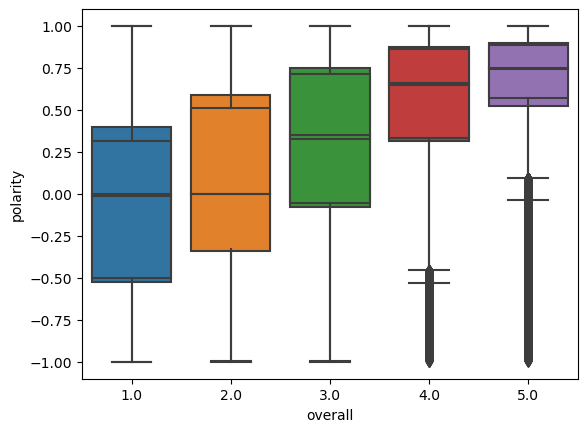

In [92]:
import seaborn as sns

# Create separate dataframes for cats and dogs
cat_data = df[df['pet_type'] == 'cat']
dog_data = df[df['pet_type'] == 'dog']

# Create boxplots for cats and dogs
sns.boxplot(x='overall', y='polarity', data=cat_data)
sns.boxplot(x='overall', y='polarity', data=dog_data)


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pip install -U scikit-learn

SyntaxError: invalid syntax (328957063.py, line 5)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mydata.csv')

# Split the dataset into training and testing sets
X = df[['feature1', 'feature2', 'feature3']] # select the features
y = df['target'] # select the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [95]:
df.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary',
       'category', 'title', 'brand', 'main_cat', 'polarity', 'pet_type',
       'sentiment'],
      dtype='object')

In [100]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

The system cannot find the path specified.
'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'spark-3.2.1-bin-hadoop3.2.tgz'


In [219]:
df2.head()

,overall,reviewTime,asin,polarity,pet_type,summary1
0,5.0,"04 16, 2014",1300450991,0.8834,dog,Puppy Booster Herbal Supplement for Dogs Puppy...
1,5.0,"04 16, 2014",1300450991,0.8628,dog,good for puppies who not have problems to keep...
2,5.0,"03 18, 2013",1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ..."
3,5.0,"04 16, 2014",130045136X,0.9603,cat,powerful protection for the dog immune system ...
4,5.0,"03 8, 2014",130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...


In [10]:
df.head()

,overall,reviewTime,asin,pet_type,sentiment,clean_review,score2
0,5.0,"04 16, 2014",1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [22]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nneka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [223]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
df2['summary1'] = df2['summary1'].apply(str)
# Remove special characters
df2['clean_review'] = df2['summary1'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
df2['clean_review'] = df2['clean_review'].str.strip()

# Define some functions for convenience

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

# Generate a new column to store the compound scores

df2['score2'] = df2.apply(lambda x: getSentScore(x['clean_review']), axis=1)

# Take a look 

df2.head(5)

,overall,reviewTime,asin,polarity,pet_type,summary1,clean_review,score2
0,5.0,"04 16, 2014",1300450991,0.8834,dog,Puppy Booster Herbal Supplement for Dogs Puppy...,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,0.8628,dog,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ...",puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,0.9603,cat,powerful protection for the dog immune system ...,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...,Dependable seller Amazon is the place to shop...,0.9404


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [20]:
def get_word_compound_scores(sentence):
    words = sentence.split()
    compound_scores = [sia.polarity_scores(word)["compound"] for word in words]
    return compound_scores


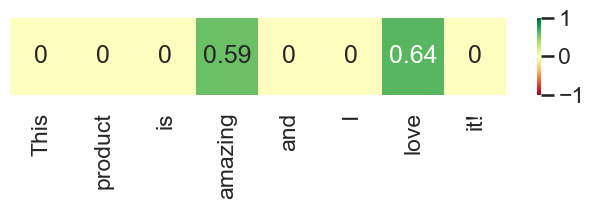

In [27]:
sentence = "This product is amazing and I love it!"
compound_scores = get_word_compound_scores(sentence)
word_list = sentence.split()

# Reshape the compound_scores to a 2D array
compound_scores_2d = np.array(compound_scores).reshape(1, -1)


# Create the heatmap
plt.figure(figsize=(len(word_list), 1))
sns.heatmap(compound_scores_2d, annot=True, xticklabels=word_list, yticklabels=False, cmap="RdYlGn", vmin=-1, vmax=1)
plt.show()


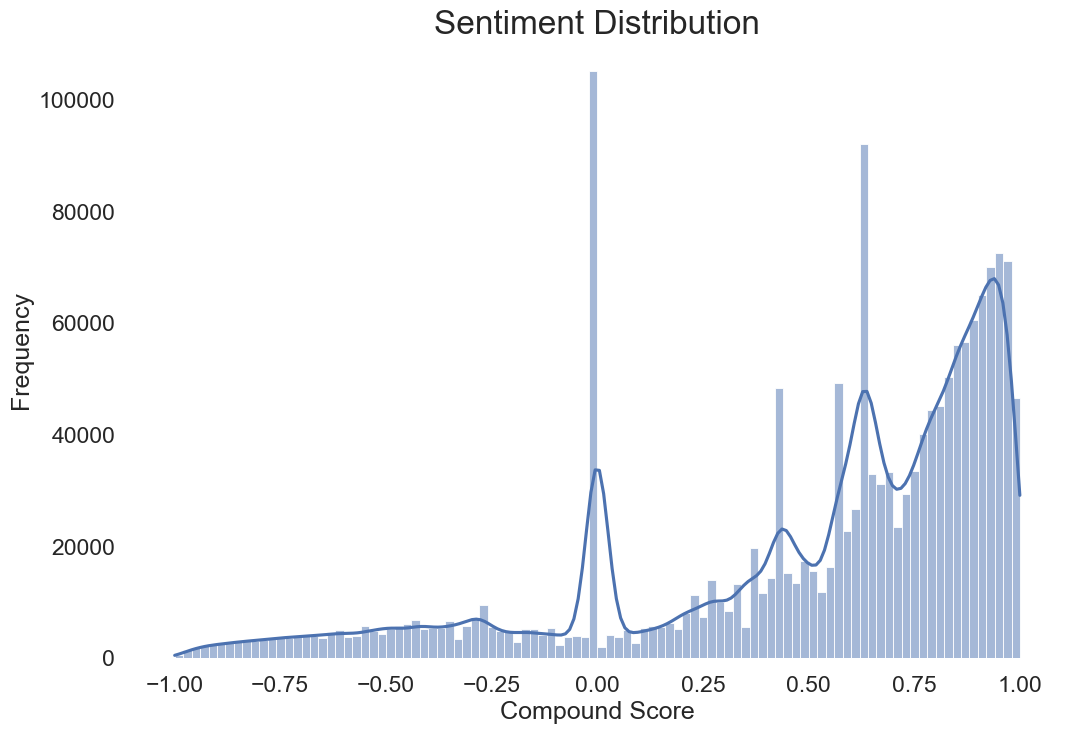

In [218]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="polarity", 
             data= df2,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

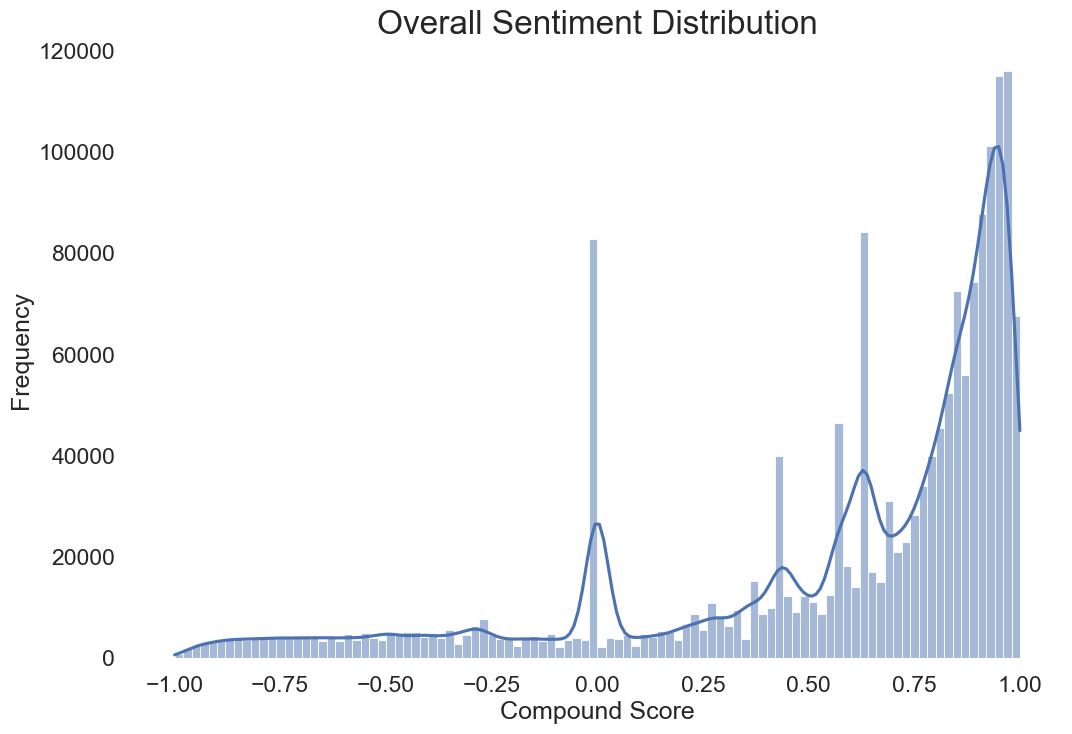

In [15]:
# Visualise the result

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,8))

# Use histplot
sns.histplot(x="score2", 
             data= df,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score")

# Remove ylabel
ax.set_ylabel("Frequency")

# Add a title
ax.set_title("Overall Sentiment Distribution", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

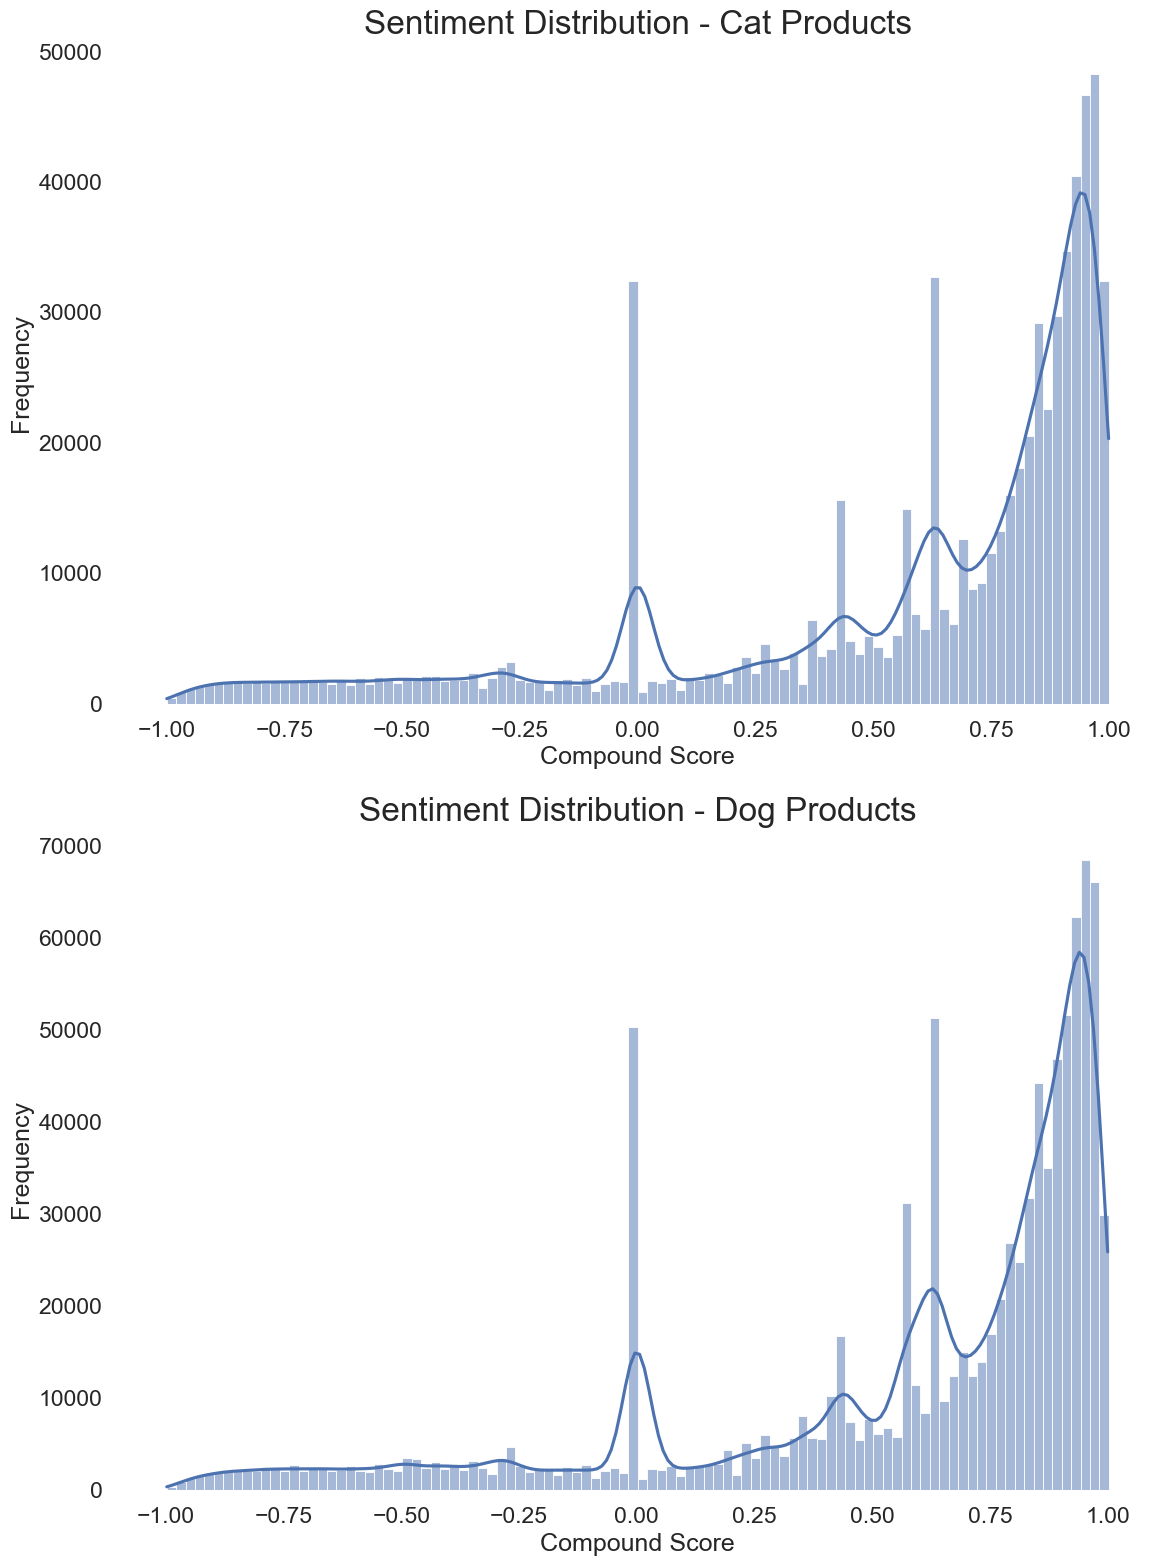

In [17]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Filter df2 for cats and dogs
df_cats = df[df['pet_type'] == 'cat']
df_dogs = df[df['pet_type'] == 'dog']

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,16))

# Use histplot for cats
sns.histplot(x="score2", 
             data=df_cats,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax1
             )
ax1.set_title("Sentiment Distribution - Cat Products", fontsize = 24)
ax1.set_xlabel("Compound Score")
ax1.set_ylabel("Frequency")
sns.despine(ax=ax1, left=True, bottom=True)

# Use histplot for dogs
sns.histplot(x="score2", 
             data=df_dogs,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02,
             ax=ax2
             )
ax2.set_title("Sentiment Distribution - Dog Products", fontsize = 24)
ax2.set_xlabel("Compound Score")
ax2.set_ylabel("Frequency")
sns.despine(ax=ax2, left=True, bottom=True)

# Show the plot
plt.tight_layout()

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

plt.show()


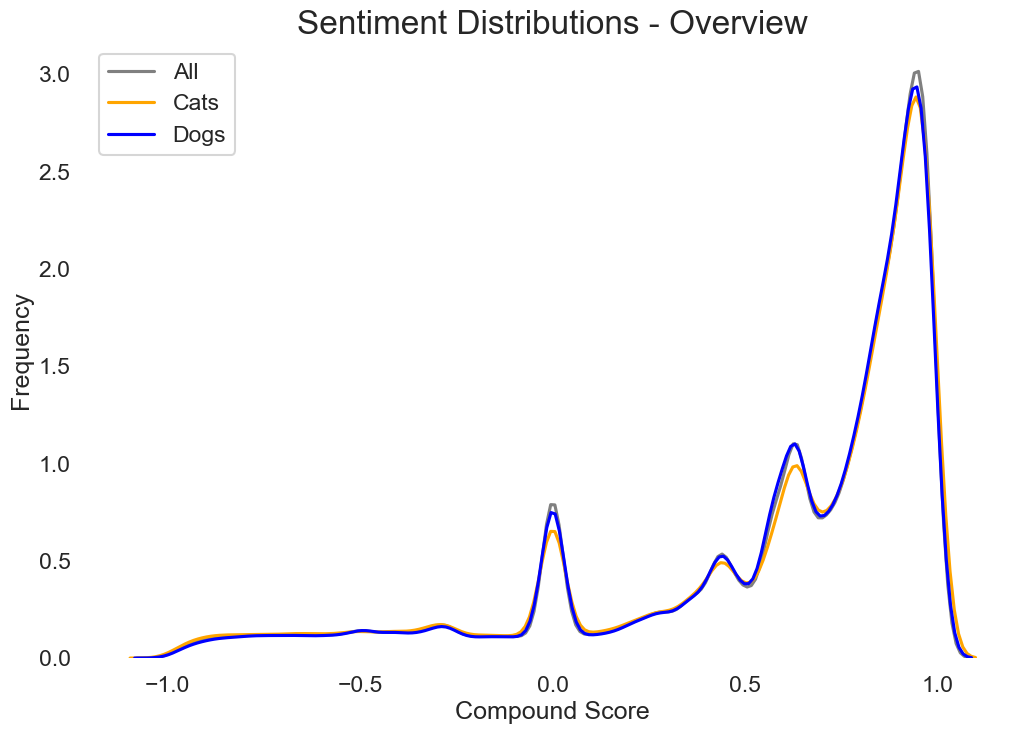

In [16]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Filter df2 for cats and dogs
df_cats = df[df['pet_type'] == 'cat']
df_dogs = df[df['pet_type'] == 'dog']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Use kdeplot for all
sns.kdeplot(x="score2", 
            data=df,
            common_norm=False,
            color='gray',
            label='All'
            )

# Use kdeplot for cats
sns.kdeplot(x="score2", 
            data=df_cats,
            common_norm=False,
            color='orange',
            label='Cats'
            )

# Use kdeplot for dogs
sns.kdeplot(x="score2", 
            data=df_dogs,
            common_norm=False,
            color='blue',
            label='Dogs'
            )

# Add labels and title
ax.set_title("Sentiment Distributions - Overview", fontsize=24)
ax.set_xlabel("Compound Score")
ax.set_ylabel("Frequency")
sns.despine(left=True, bottom=True)

# Add legend
ax.legend()

# Save the figure
plt.savefig("sentDist.png",
            bbox_inches="tight",
            dpi=200)

# Show the plot
plt.show()


In [232]:
df2.head()

,overall,reviewTime,asin,polarity,pet_type,summary1,clean_review,score2
0,5.0,"04 16, 2014",1300450991,0.8834,dog,Puppy Booster Herbal Supplement for Dogs Puppy...,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,0.8628,dog,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,0.9511,dog,"puppy booster is perfect for my puppy, I love ...",puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,0.9603,cat,powerful protection for the dog immune system ...,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,0.9404,cat,Dependable seller! Amazon is the place to shop...,Dependable seller Amazon is the place to shop...,0.9404


In [12]:
df.head()

,overall,reviewTime,asin,pet_type,sentiment,clean_review,score2
0,5.0,"04 16, 2014",1300450991,dog,positive,Puppy Booster Herbal Supplement for Dogs Puppy...,0.8834
1,5.0,"04 16, 2014",1300450991,dog,positive,good for puppies who not have problems to keep...,0.9435
2,5.0,"03 18, 2013",1300450991,dog,positive,puppy booster is perfect for my puppy I love ...,0.9880
3,5.0,"04 16, 2014",130045136X,cat,positive,powerful protection for the dog immune system ...,0.9730
4,5.0,"03 8, 2014",130045136X,cat,positive,Dependable seller Amazon is the place to shop...,0.9404


In [31]:
# Assuming the DataFrame is named 'df' and the Time column is named 'reviewTime'

# Group by year and count the number of entries per year
entries_per_year = df.groupby(df['reviewTime'].dt.year).size()

# Display the result
print(entries_per_year)


reviewTime
2001         1
2002         7
2003         8
2004        41
2005       140
2006       498
2007      1739
2008      3535
2009      6047
2010     10332
2011     21653
2012     41316
2013    122551
2014    219374
2015    347195
2016    423515
2017    334457
2018    143035
dtype: int64
